# Исследование объявлений о продаже квартир

Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

**Цель** — установить параметры для определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` — число балконов;
* `ceiling_height` — высота потолков (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населённого пункта;
* `open_plan` — свободная планировка (булев тип);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);
* `rooms` — число комнат;
* `studio` — квартира-студия (булев тип);
* `total_area` — общая площадь квартиры в квадратных метрах (м²);
* `total_images` — число фотографий квартиры в объявлении.

**План:**
* исследование характеристик квартир;
* изучение скорости продажи квартир;
* изучение влияния различных факторов на цену квартир;
* вычисление средней цены квадратного метра объектов в населенных пунктах с наибольшим числом объявлений;
* вычисление средней цены цены объекта в зависимости от расстояния до административного центра исследуемого региона - Санкт-Петербурга.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-пропусков" data-toc-modified-id="Удаление-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Обработка-аномальных-и-редких-значений" data-toc-modified-id="Обработка-аномальных-и-редких-значений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка аномальных и редких значений</a></span></li><li><span><a href="#Расчет-и-добавление-новых-столбцов" data-toc-modified-id="Расчет-и-добавление-новых-столбцов-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Расчет и добавление новых столбцов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-параметров-объектов" data-toc-modified-id="Анализ-параметров-объектов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ параметров объектов</a></span></li><li><span><a href="#Изучение-скорости-продажи-квартир" data-toc-modified-id="Изучение-скорости-продажи-квартир-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изучение скорости продажи квартир</a></span></li><li><span><a href="#Изучение-влияния-различных-факторов-на-цену-объекта" data-toc-modified-id="Изучение-влияния-различных-факторов-на-цену-объекта-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изучение влияния различных факторов на цену объекта</a></span></li><li><span><a href="#Вычисление-средней-цены-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений" data-toc-modified-id="Вычисление-средней-цены-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вычисление средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</a></span></li><li><span><a href="#Вычисление-средней-цены-километра" data-toc-modified-id="Вычисление-средней-цены-километра-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вычисление средней цены километра</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Обзор данных

In [2]:
try:
    data = pd.read_csv('datasets\real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

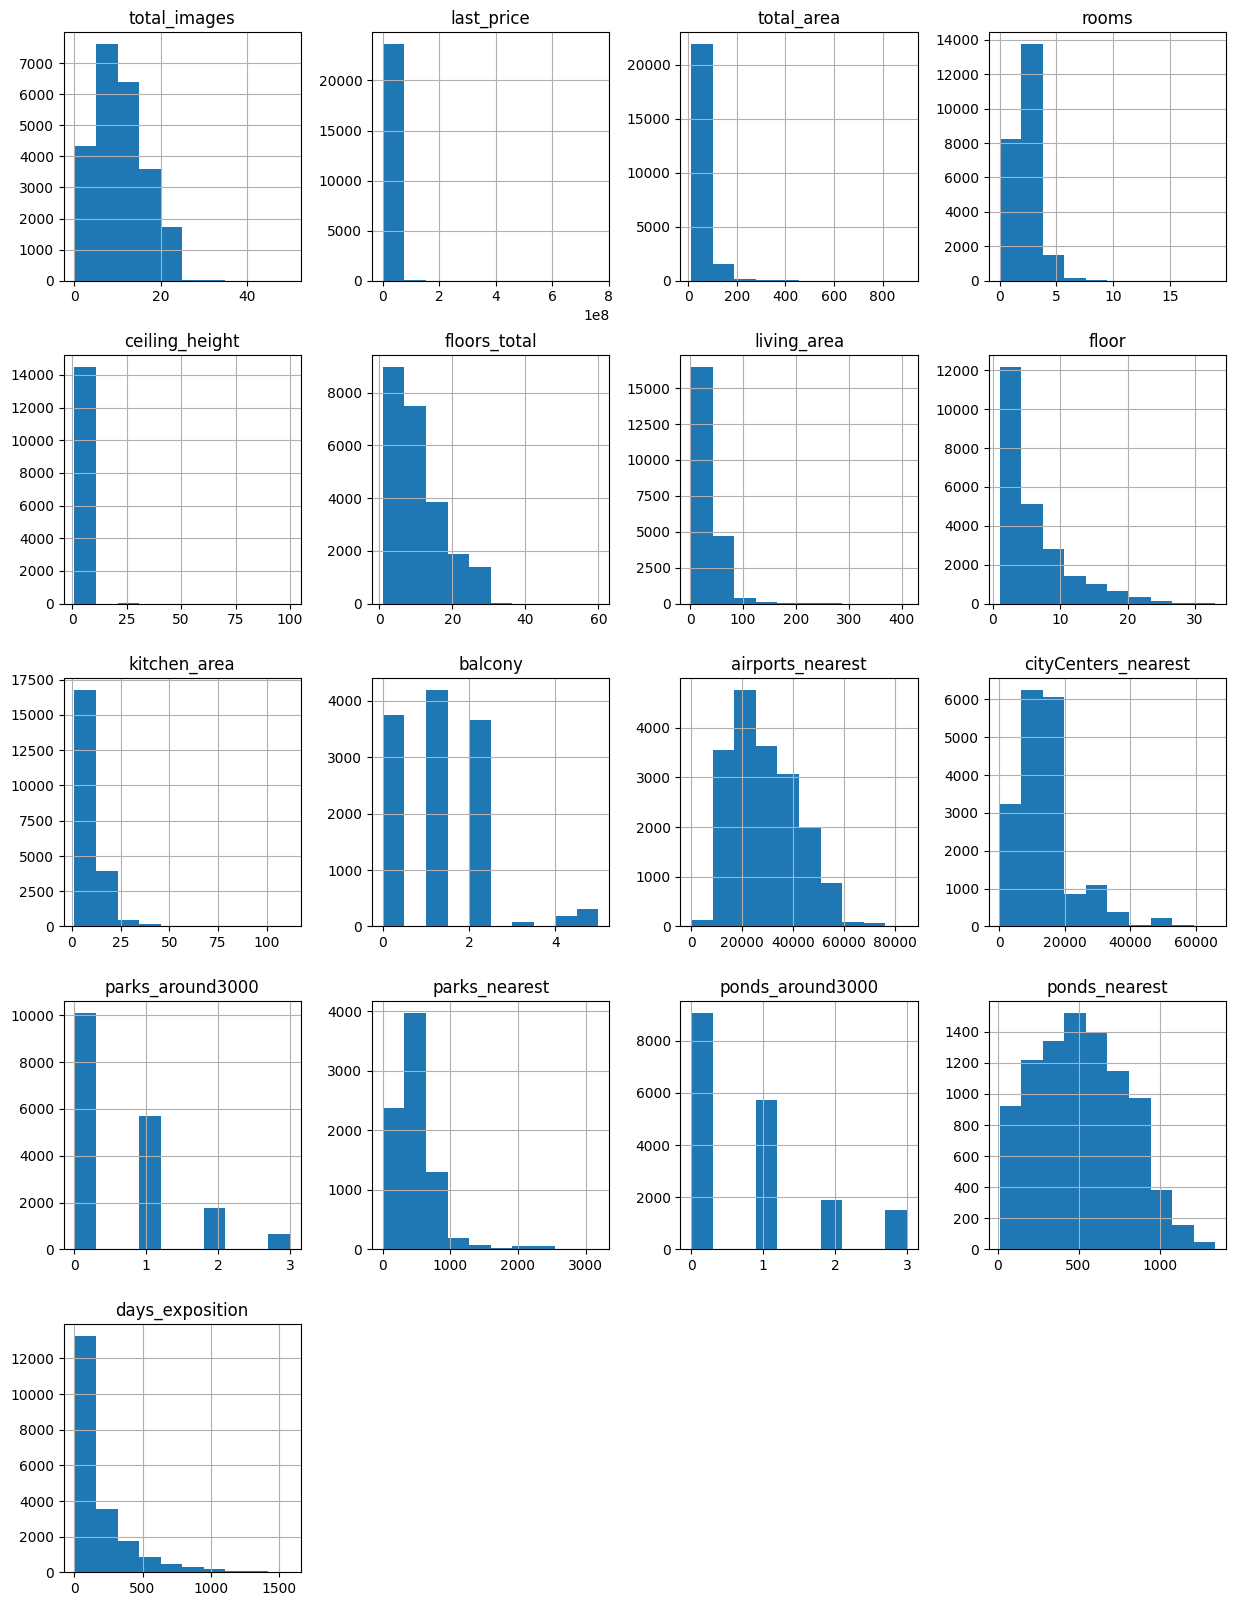

In [5]:
data.hist(figsize=(15, 20));

## Предобработка данных

### Удаление пропусков

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Столбцы `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` и `days_exposition` содержат пропущенные значения.

In [7]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Поскольку столбец `is_apartment` (апартаменты) содержит булевы значения, большая часть которых `'False'`, заменим пропущенные значения на False. 

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Пропуск значения в столбце `balcony` (количество балконов) будем считать за отстутсвие балконов.

In [9]:
data['balcony'] = data['balcony'].fillna(0)

Пропуски в названии населенного пункта (`locality_name`) заменим на "Не указан".

In [10]:
data['locality_name'] = data['locality_name'].fillna('Не указан')

Пропусков в данных о количестве этажей в доме крайне мало по отношению ко всему датасету. Записи с этими пропусками можно удалить, так как не представляется возможным их заполнить.

In [11]:
data = data.dropna(subset=['floors_total'])

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Заполнены все возможные к заполнению пропуски в данных.
* Пропуски в высотах потолков, жилой площади и площади кухни нечем заполнить. Так как значения данных столбцов не зависят от значений других столбцов, выделение каких-либо групп и заполнение средним или медианным значением невозможно. Причиной пропусков может являться случайное или намернное неуказание информации продавцом.
* Данные о расстоянии до ближайшего аэропорта, центра города, парка и пруда, как и данные о количестве парков и прудов, должны были быть внесены автоматически на основе географического положения. Возможно, информация о точном местоположении жилья была внесена некорректно или не внесена вовсе, поэтому системе не удалось заполнить перечисленные поля. Причиной также может являться отсутсвие данной возможности в ранних версиях сервиса.
* Пропуски в данных о количестве дней, прошедших с момента публикации объявления до момента продажи, скорее всего обусловлены тем, что квартира до сих пор не продана.

### Изменение типов данных

Приведем столбцы к необходимому типу данных. Такими столбцами будут следующие:
* `last_price` - копейки не повлияют на результат анализа, поэтому их можно отбросить, приведя значения к int; 
* `first_day_exposition` - для дальнейшего исследования понадобится выполнять математические операции с датой. Для этого нужно преобразвание даты из строчного типа в datetime;
* `floors_total`,  `balcony` - не бывает дробного числа этажей и балконов, поэтому должен быть тип int;
* `is_apartment` - поскольку признак бинарный, тип данных должен быть bool;
* `days_exposition` - пусть даже если в данных есть дробное число дней, их округление до целого ни на что не повлияет. Поэтому int.

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['is_apartment'] = data['is_apartment'].astype('bool')

data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int32         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

### Обработка дубликатов

In [14]:
data.duplicated().sum()

0

Явных дубликатов в данных нет. Необходимо проверить существование неявных. Такие дубликаты могут встретиться в столбце `locality_name`.

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Избавиться от некоторых повторяющихся значений поможет замены буквы 'ё' на 'е'. Далее поиск осуществляется вручную.

In [16]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [17]:
data['locality_name'] = data['locality_name'].replace(
    {        
        'городской поселок Большая Ижора' : 'поселок городского типа Большая Ижора',
        'городской поселок Лесогорский' : 'поселок городского типа Лесогорский',
        'городской поселок Мга' : 'поселок городского типа Мга',
        'поселок Мурино' : 'Мурино',
        'городской поселок Назия' : 'поселок городского типа Назия',
        'городской поселок Рощино' : 'поселок городского типа Рощино',
        'городской поселок Советский' : 'поселок городского типа Советский',        
    }
)

### Обработка аномальных и редких значений

In [18]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,14495.000000,23613.000000,21743.000000,23613.000000,21382.000000,23613.000000,18081.000000,18104.000000,18105.000000,8045.000000,18105.000000,9061.000000,20441.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.771495,10.673824,34.462781,5.877313,10.564128,0.593063,28788.008185,14185.084015,0.611433,490.554630,0.770119,518.209469,180.884839
std,5.681541,1.090172e+07,35.648988,1.078380,1.261445,6.597173,22.037433,4.873539,5.904316,0.960307,12626.209956,8614.132292,0.802168,341.336698,0.939075,277.887489,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13093.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Общая площадь**

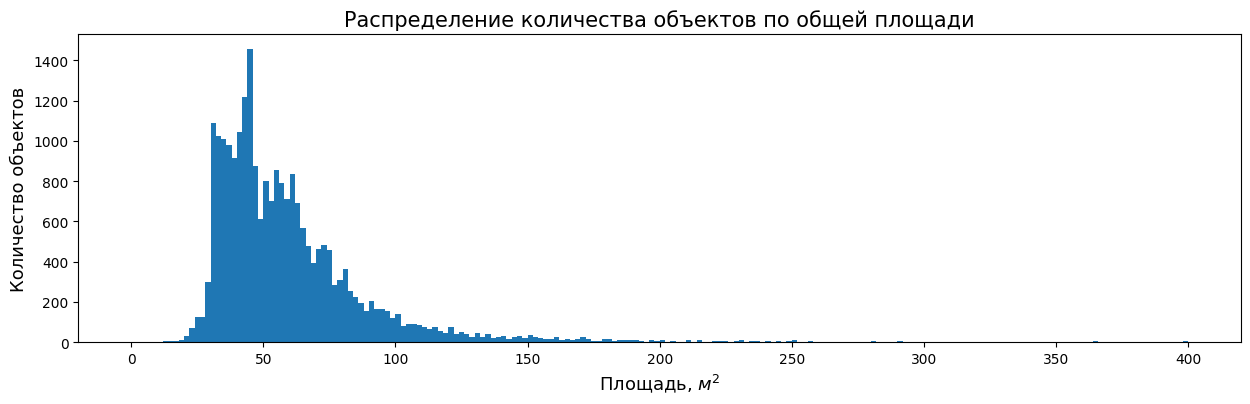

In [19]:
(
    data['total_area']
    .plot(kind='hist', bins=200, range=(0, 400), figsize = (15, 4))
);
plt.title("Распределение количества объектов по общей площади", fontsize=15);
plt.xlabel("Площадь, $м^2$", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Редкими являются квартиры общей площадью менее 25 $м^2$ и более 250 $м^2$. Отфильтруем их.

In [20]:
data = data.query('25 <= total_area <= 250 or total_area.isna()')

**Число комнат**

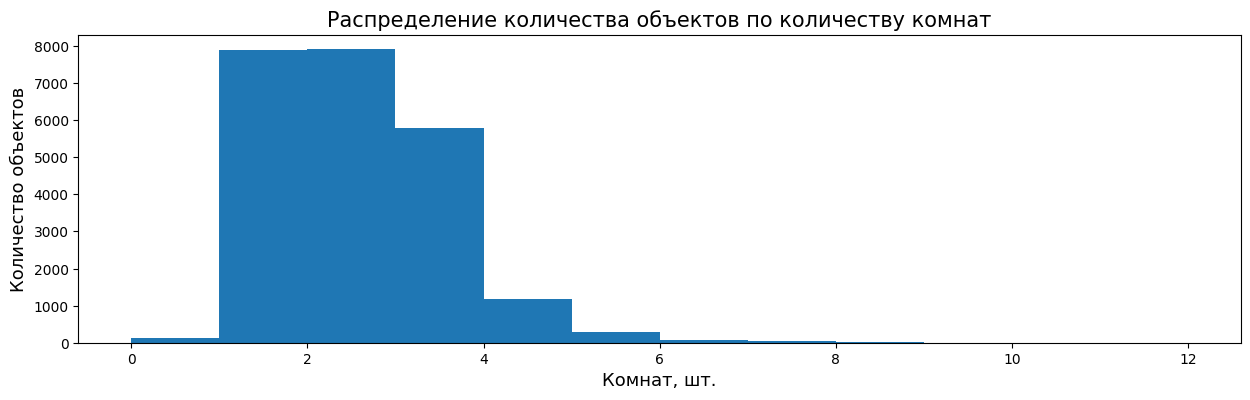

In [21]:
(
    data['rooms']
    .plot(kind='hist', bins=12, range=(0,12), figsize = (15,4))
);
plt.title("Распределение количества объектов по количеству комнат", fontsize=15);
plt.xlabel("Комнат, шт.", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Количество комнат ограничим 8-ю.

In [22]:
data = data.query('rooms <= 7')

**Высота потолков**

In [23]:
data['ceiling_height'].value_counts().sort_index().head(20)

1.00       1
1.20       1
1.75       1
2.00      11
2.25       1
2.30       4
2.34       1
2.40      23
2.45      15
2.46       2
2.47       3
2.48       8
2.49       1
2.50    3500
2.51      33
2.52      78
2.53      67
2.54      82
2.55     977
2.56     139
Name: ceiling_height, dtype: int64

In [24]:
data['ceiling_height'].value_counts().sort_index().tail(20)

4.8      1
4.9      1
5.0      1
5.3      1
5.5      1
5.8      1
6.0      1
8.0      3
8.3      1
10.3     1
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     8
27.5     1
32.0     2
100.0    1
Name: ceiling_height, dtype: int64

Вероятно, при указании высоты потолков были допущены ошибки. Поэтому существуют потолки высотой до 2.3 метров. Исключим такие квартиры из исследования. 

Существование потолков выше 5.5 метров тоже маловероятно. Однако здесь, в значениях в диапазоне 23.0-32.0, скорее всего, допущена ошибка при указании вещественной части. Поэтому имеет смысл привести эти значения к диапазону 2.3-3.2. 

In [25]:
data.loc[(data['ceiling_height'] >= 23) & (data['ceiling_height'] <= 32), 'ceiling_height'] = \
data.loc[(data['ceiling_height'] >= 23) & (data['ceiling_height'] <= 32), 'ceiling_height'] / 10

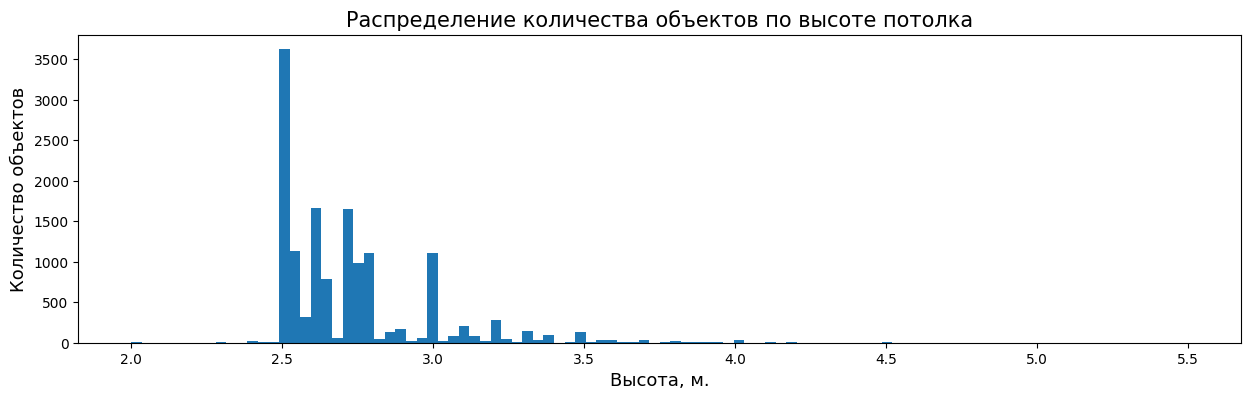

In [26]:
(
    data['ceiling_height']
    .plot(kind='hist', bins=100, range=(2,5.5), figsize = (15,4))
);
plt.title("Распределение количества объектов по высоте потолка", fontsize=15);
plt.xlabel("Высота, м.", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Оставшиеся значения, которые невозможно привести к корректному виду, отфильтруем вместе с редкими значениями. Таковыми являются площади высоты до 2.5 м. и более 3.7 м.

In [27]:
data = data.query('2.5 <= ceiling_height <= 3.7 or ceiling_height.isna()')

**Жилая площадь**

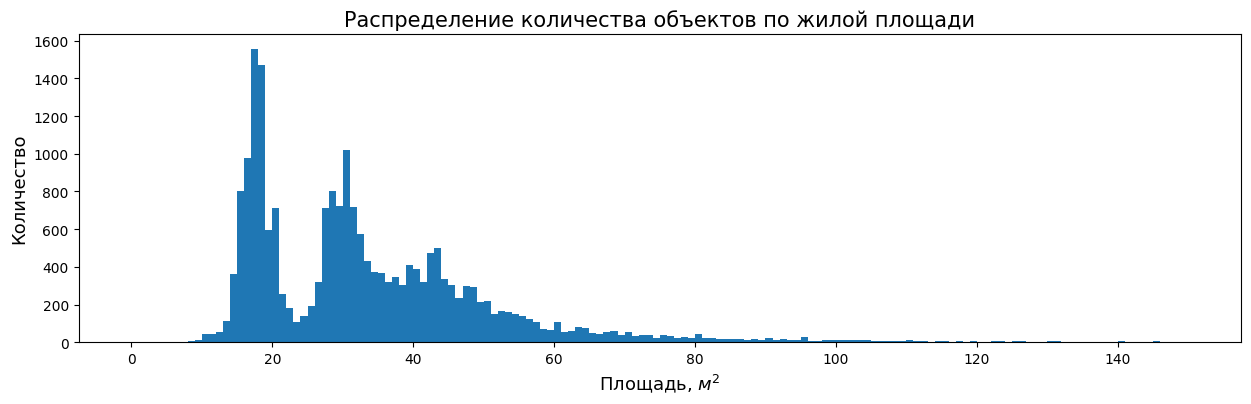

In [28]:
(
    data['living_area']
    .plot(kind='hist', bins=150, range=(0,150), figsize = (15,4))
);
plt.title("Распределение количества объектов по жилой площади", fontsize=15);
plt.xlabel("Площадь, $м^2$", fontsize=13);
plt.ylabel("Количество", fontsize=13);

Также исключим квартиры жилой площадью до 10 $м^2$ и более 130 $м^2$.

In [29]:
data = data.query('10 <= living_area <= 130 or living_area.isna()')

**Площадь кухни**

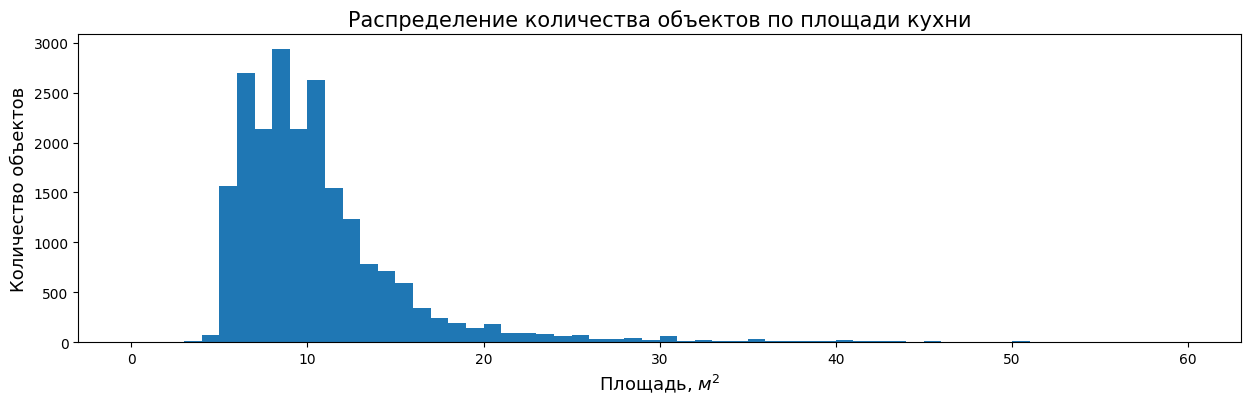

In [30]:
(
    data['kitchen_area']
    .plot(kind='hist', bins=60, range=(0,60), figsize = (15,4))
);
plt.title("Распределение количества объектов по площади кухни", fontsize=15);
plt.xlabel("Площадь, $м^2$", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Минимальной площадью кухни установим 4 $м^2$. Максимальной - 45 $м^2$.

In [31]:
data = data.query('4 <= kitchen_area <= 45 or kitchen_area.isna()')

**Расстояние до ближайшего аэропорта**

In [32]:
data['airports_nearest'].value_counts().sort_index().tail(30)

69690.0    1
69706.0    1
69715.0    1
69775.0    1
69785.0    1
70016.0    2
71529.0    1
71597.0    2
71618.0    2
71869.0    1
72005.0    1
72033.0    1
72078.0    1
72280.0    1
72284.0    1
72469.0    2
72713.0    1
73115.0    1
73391.0    1
73547.0    1
73827.0    1
75646.0    1
78527.0    1
81355.0    1
81607.0    1
83758.0    1
84006.0    1
84665.0    1
84853.0    1
84869.0    1
Name: airports_nearest, dtype: int64

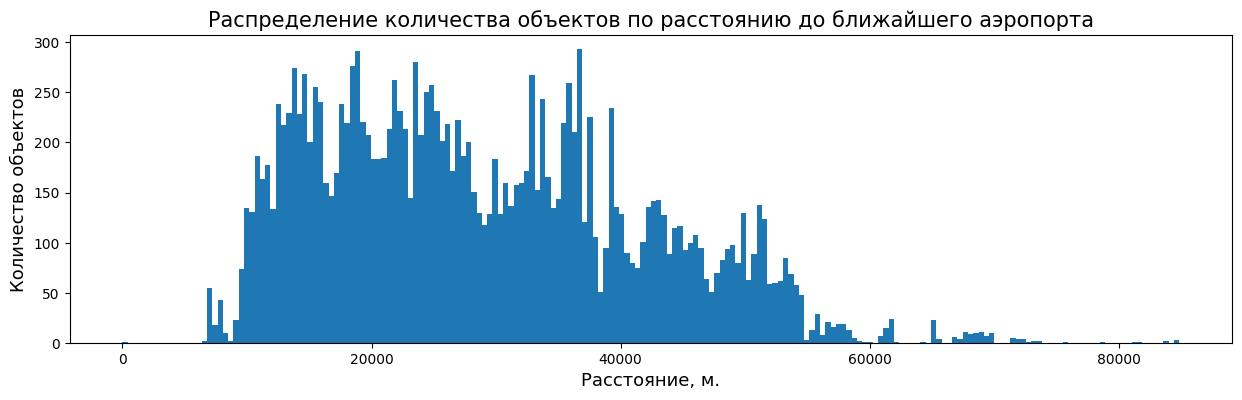

In [33]:
(
    data['airports_nearest']
    .plot(kind='hist', bins=200, figsize = (15,4))
);
plt.title("Распределение количества объектов по расстоянию до ближайшего аэропорта", fontsize=15);
plt.xlabel("Расстояние, м.", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Здесь редкими будем считать те объекты, которые не находятся на расстоянии 5000-60000 м. от ближайшего аэропорта.

In [34]:
data = data.query('5000 <= airports_nearest <= 60000 or airports_nearest.isna()')

**Этажность дома**

Этажность дома объектов отфильтруем по максимальному значению этажа среди всех объектов.

In [35]:
data = data.query('floors_total <= floor.max() or floors_total.isna()')

**Стоимость**

In [36]:
data['last_price'].value_counts().sort_index().head(10)

12190.0     1
430000.0    2
440000.0    1
450000.0    4
470000.0    3
480000.0    1
490000.0    2
500000.0    4
520000.0    1
530000.0    1
Name: last_price, dtype: int64

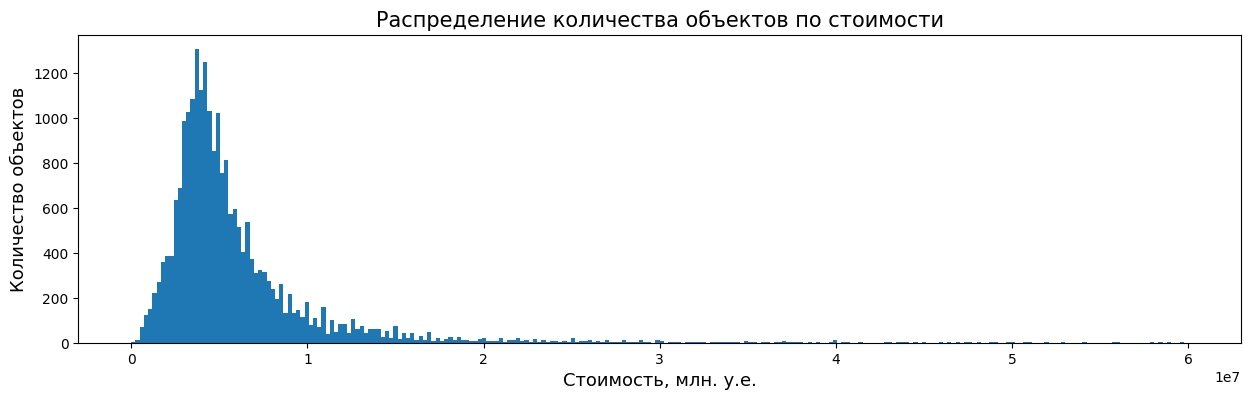

In [37]:
(
    data['last_price']
    .plot(kind='hist', bins=250, range=(0, 6e7), figsize = (15,4))
);
plt.title("Распределение количества объектов по стоимости", fontsize=15);
plt.xlabel("Стоимость, млн. у.е.", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Исключим объекты со стоимостью ниже 1.3 млн. у.е. и выше 40 млн. у.е.

In [38]:
data = data.query('1.3e6 <= last_price <= 4e7')

**Число дней до снятия объявления**

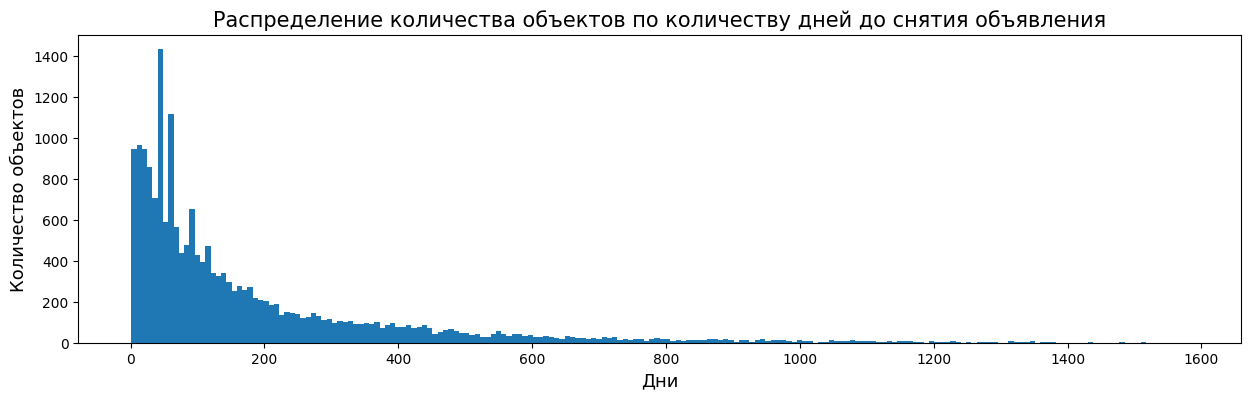

In [39]:
(
    data['days_exposition']
    .plot(kind='hist', bins=200, figsize = (15,4))
);
plt.title("Распределение количества объектов по количеству дней до снятия объявления", fontsize=15);
plt.xlabel("Дни", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

На графике видны выбивающиеся значения. Рассмотрим подробнее диапазон 0-150 дней.

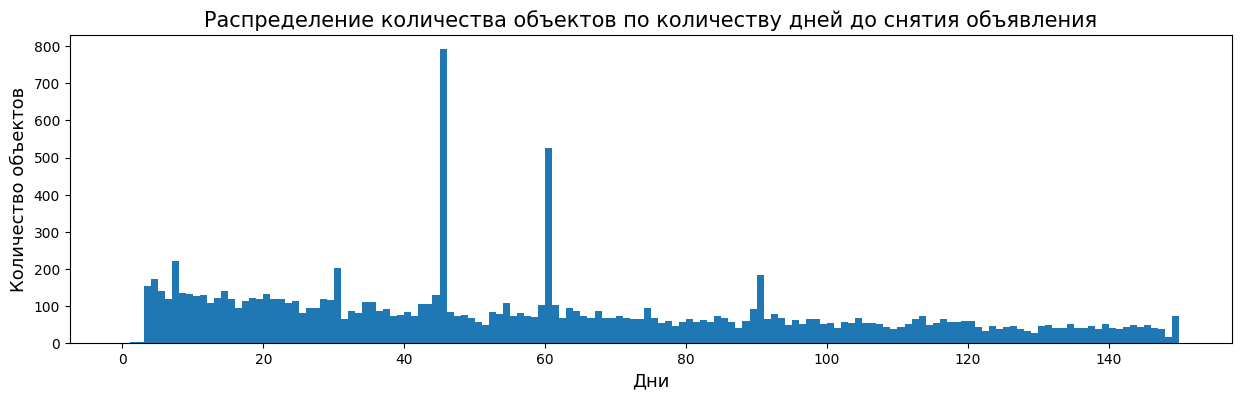

In [40]:
(
    data['days_exposition']
    .plot(kind='hist', bins=150, range=(0,150), figsize = (15,4))
);
plt.title("Распределение количества объектов по количеству дней до снятия объявления", fontsize=15);
plt.xlabel("Дни", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

In [41]:
data['days_exposition'].value_counts().head()

45.0    792
60.0    525
7.0     222
30.0    201
90.0    183
Name: days_exposition, dtype: int64

Действительно, в 7-й, 30-й, 45-й, 60-й и 90-й дни значения сильно выбиваются по сравнению с остальными. Предположительно, спустя перечисленное количество дней, сервис автоматически снимает объявление с публикации, и поэтому стоило бы отфильтровать эти данные. Однако, поскольку невозможно узнать, какие именно объявления были сняты автоматически, а какие - в результате продажи, пришлось бы отфильтровать все объявления за эти дни, из-за чего может быть потеряно более 10% датасета. Поэтому оставим все как есть, за исключением редкостей (объектов, продававшихся более 1000 дней), и узнаем у специалистов, собиравших данные, есть ли возможность отследить автоматически снятые объявления.

In [42]:
data = data.query('days_exposition <= 1000 or days_exposition.isna()')

### Расчет и добавление новых столбцов

Рассчитаем и добавим в таблицу цену за квадратный метр.

In [43]:
data['square_meter_price'] = round(data['last_price'] / data['total_area'], 2)

Добавим день недели, месяц и год публикации объявления.

In [44]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

Напишем функцию для определения типа этажа, работающую по следующему правилу:
* если floor = 1 - `'первый'`;
* если floor = floors_total - `'последний'`;
* иначе - `'другой'`.

In [45]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        if floor == floors_total:
            return 'последний'
        if floor <= 0:
            return 'некорректный'
        return 'другой'
    except:
        pass

In [46]:
data['floor_type'] = data.apply(floor_type, axis=1)

In [47]:
data['floor_type'].isna().sum()

0

Рассчитаем расстояние до центра города в километрах и округлим значение до целого.

In [48]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

## Исследовательский анализ данных

### Анализ параметров объектов

**Анализ общей площади**

count    21970.000000
mean        58.210705
std         25.885078
min         25.000000
25%         40.200000
50%         52.000000
75%         68.900000
max        250.000000
Name: total_area, dtype: float64


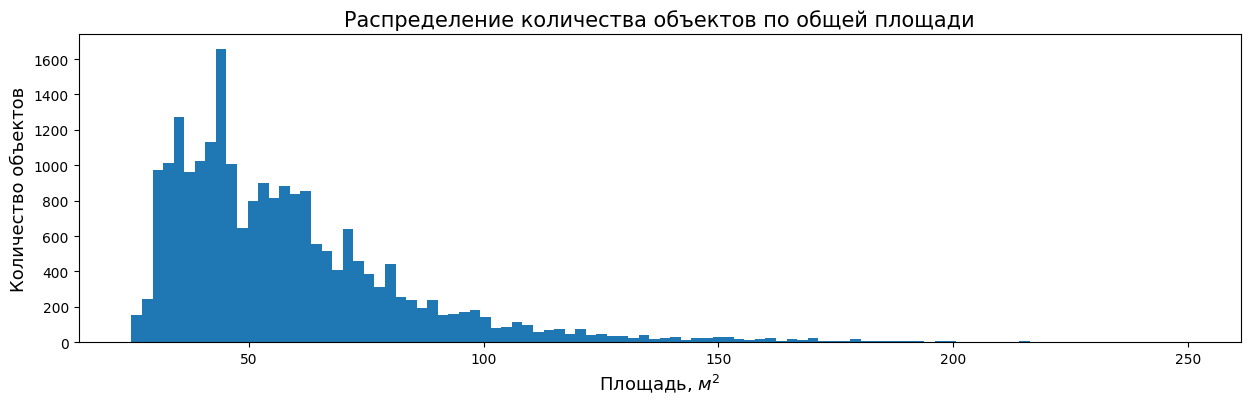

In [49]:
print(data['total_area'].describe())
(
    data['total_area']
    .plot(kind='hist', bins=100, figsize = (15,4))
);
plt.title("Распределение количества объектов по общей площади", fontsize=15);
plt.xlabel("Площадь, $м^2$", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Площадь большинства квартир находится в интервале от 27 до 75 $м^2$. 

Медианное и среднее значения находятся близко друг к другу (52 $м^2$ и 58.21 $м^2$ соответственно).

**Анализ жилой площади**

count    20272.000000
mean        33.191647
std         16.835626
min         10.000000
25%         18.700000
50%         30.000000
75%         42.000000
max        130.000000
Name: living_area, dtype: float64


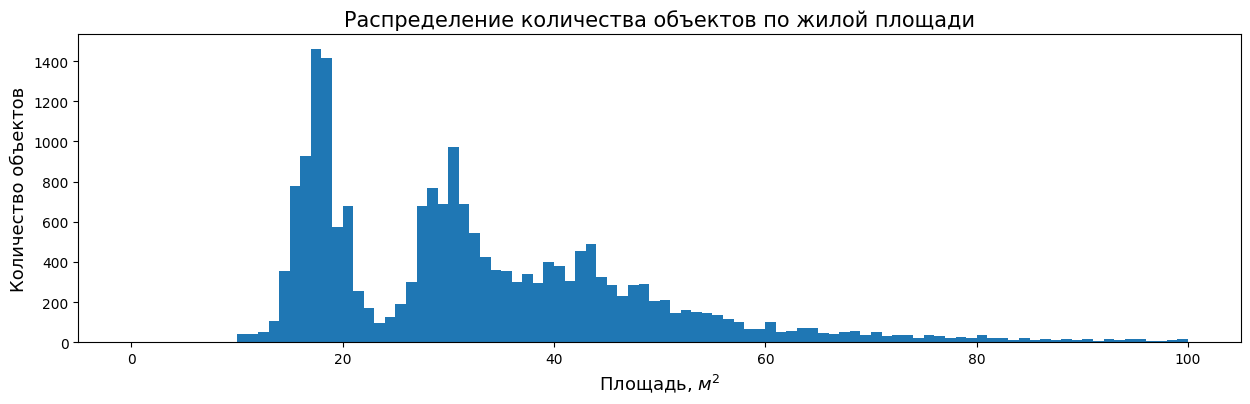

In [50]:
print(data['living_area'].describe())
(
    data['living_area']
    .plot(kind='hist', bins=100, range=(0,100), figsize = (15,4))
);
plt.title("Распределение количества объектов по жилой площади", fontsize=15);
plt.xlabel("Площадь, $м^2$", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

В случае с жилой площадью не все однозначно: основная масса квартир представлена диапазонами площадей, примерно, от 15 до 21 $м^2$ и от 25 до 50 $м^2$. Первый диапазон, скорее, связан со студиями, апартаментами и той частью однокомнатных квартир, которые имеют малую жилплощадь, а второй - с однокомнатными квартирами большей площади и двукомнатными квартирами. 

При этом медианное и среднее значения также близки (30 $м^2$ и 33.12 $м^2$ соответственно).

**Анализ площади кухни**

count    20032.000000
mean        10.288892
std          4.812747
min          4.000000
25%          7.000000
50%          9.100000
75%         11.900000
max         45.000000
Name: kitchen_area, dtype: float64


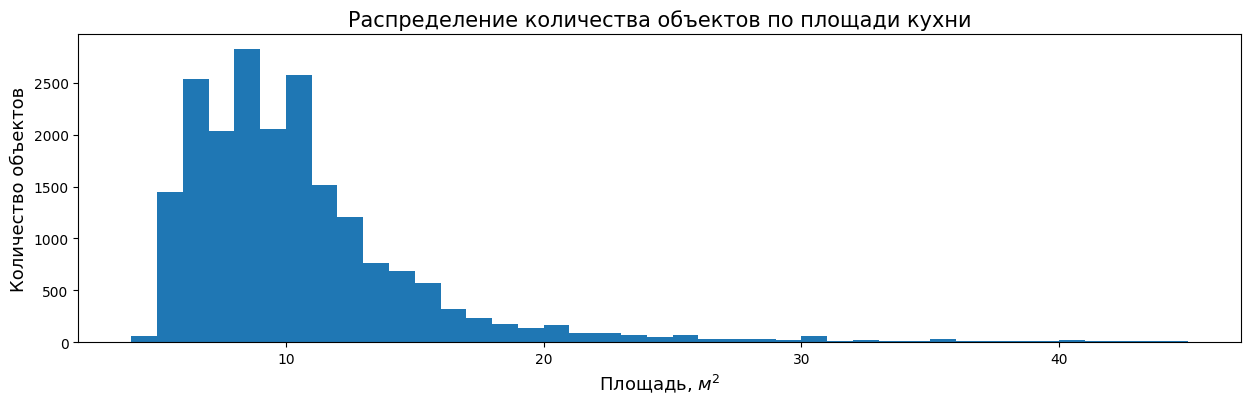

In [51]:
print(data['kitchen_area'].describe())
(
    data['kitchen_area']
    .plot(kind='hist', bins=41, figsize = (15,4))
);
plt.title("Распределение количества объектов по площади кухни", fontsize=15);
plt.xlabel("Площадь, $м^2$", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Большинство квартир имеет площадь кухни от 5 до 13 $м^2$. 

Среднее и медианное значение - 10.29 $м^2$ и 9.1 $м^2$ соответственно.

**Анализ цены объекта**

count    2.197000e+04
mean     5.874617e+06
std      4.281281e+06
min      1.300000e+06
25%      3.500000e+06
50%      4.650000e+06
75%      6.700000e+06
max      4.000000e+07
Name: last_price, dtype: float64


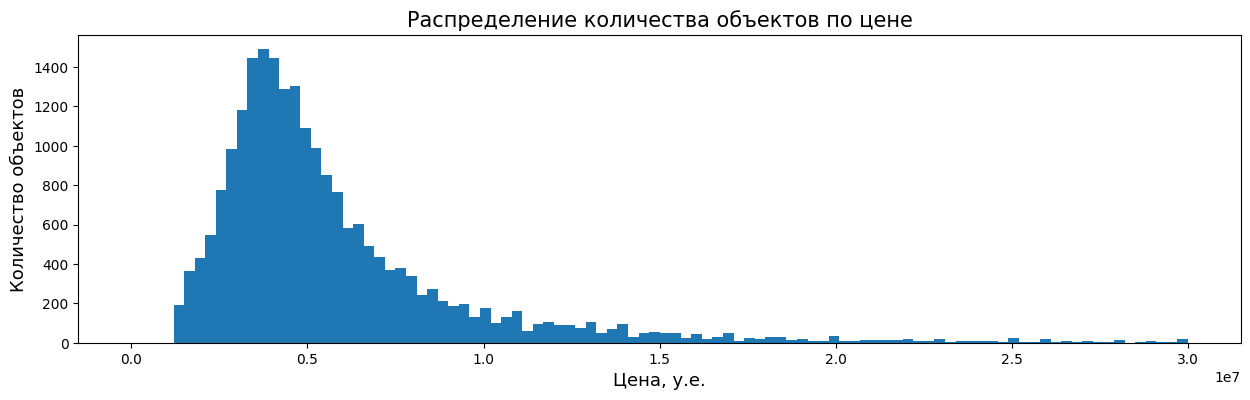

In [52]:
print(data['last_price'].describe())
(
    data['last_price']
    .plot(kind='hist', bins=100, range=(0,3e7), figsize = (15,4))
);
plt.title("Распределение количества объектов по цене", fontsize=15);
plt.xlabel("Цена, у.е.", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Цена на большинство квартир находится в пределах 2-8 млн. у.е.

Медианная цена - 4.65 млн. у.е., средняя - 5.87 млн. у.е.

**Анализ количества комнат**

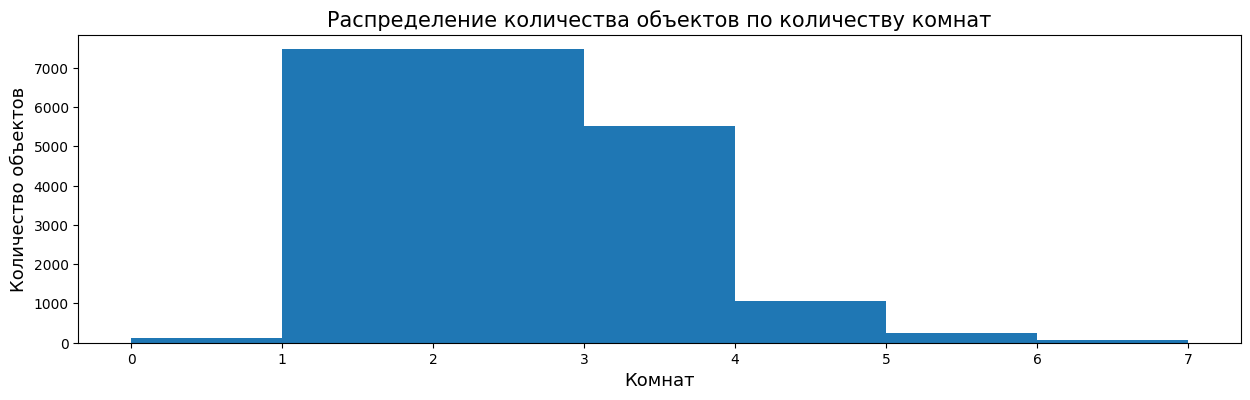

In [53]:
(
    data['rooms']
    .plot(kind='hist', bins=7, range=(0,7), figsize = (15,4))
);
plt.title("Распределение количества объектов по количеству комнат", fontsize=15);
plt.xlabel("Комнат", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Больше всего объявлений было размещено о продаже 1-2-коммнатных квартир. Также преобладают и трехкомнатные квартиры.

**Анализ высоты потолков**

count    13481.000000
mean         2.708517
std          0.230494
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          3.700000
Name: ceiling_height, dtype: float64


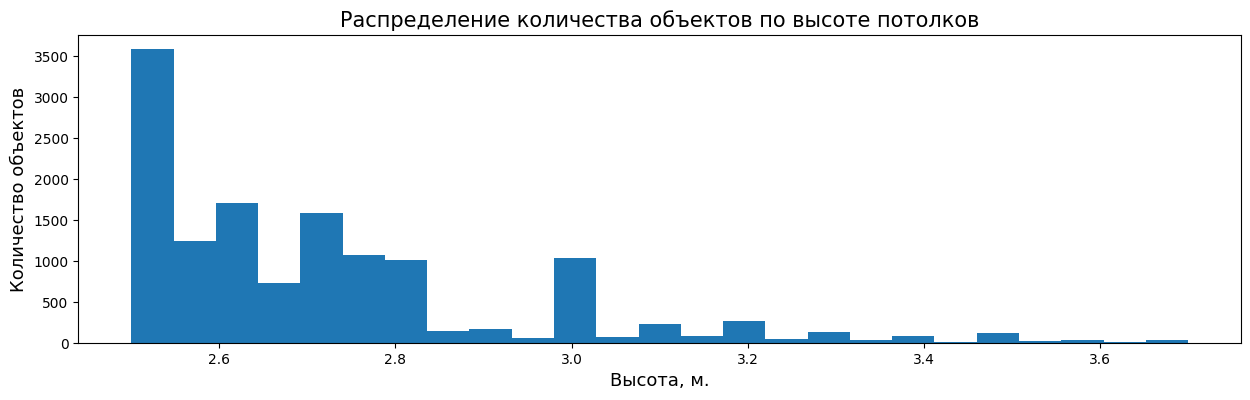

In [54]:
print(data['ceiling_height'].describe())
(
    data['ceiling_height']
    .plot(kind='hist', bins=25, figsize = (15,4))
);
plt.title("Распределение количества объектов по высоте потолков", fontsize=15);
plt.xlabel("Высота, м.", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Большинство представленных квартир имеет высоту потолка от 2.5 до 2.8 метров.

**Анализ этажа квартиры**

count    21970.000000
mean         5.951980
std          4.875314
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         32.000000
Name: floor, dtype: float64


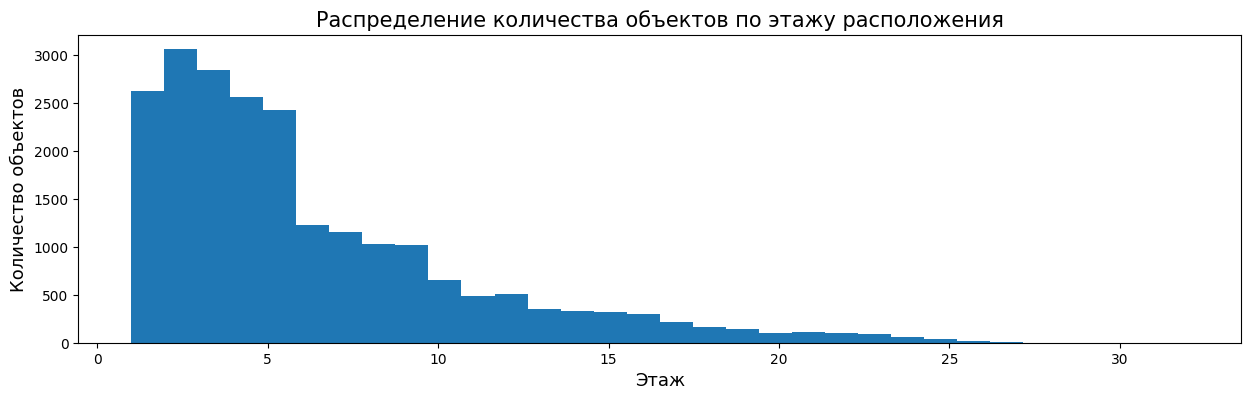

In [55]:
print(data['floor'].describe())
data['floor'].hist(bins=32, figsize = (15,4), grid=False)
plt.title("Распределение количества объектов по этажу расположения", fontsize=15);
plt.xlabel("Этаж", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Большинство квартир располагается на 1-10 этажах.

**Анализ типа этажа квартиры**

другой       16353
последний     2991
первый        2626
Name: floor_type, dtype: int64


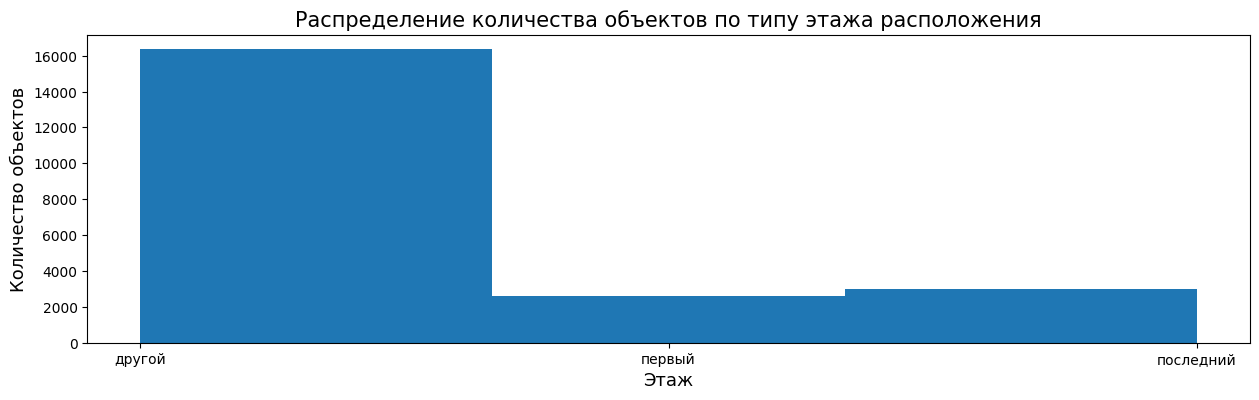

In [56]:
print(data['floor_type'].value_counts())
data['floor_type'].hist(bins=3, figsize = (15,4), grid=False)
plt.title("Распределение количества объектов по типу этажа расположения", fontsize=15);
plt.xlabel("Этаж", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Больше всего продавалось квартир, находящихся между первым и последним этажом. Всего лишь чуть больше четверти всех квартир располагалось на первом и последнем этажах.

**Анализ общего количества этажей в доме**

count    21970.000000
mean        10.842558
std          6.528412
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         33.000000
Name: floors_total, dtype: float64


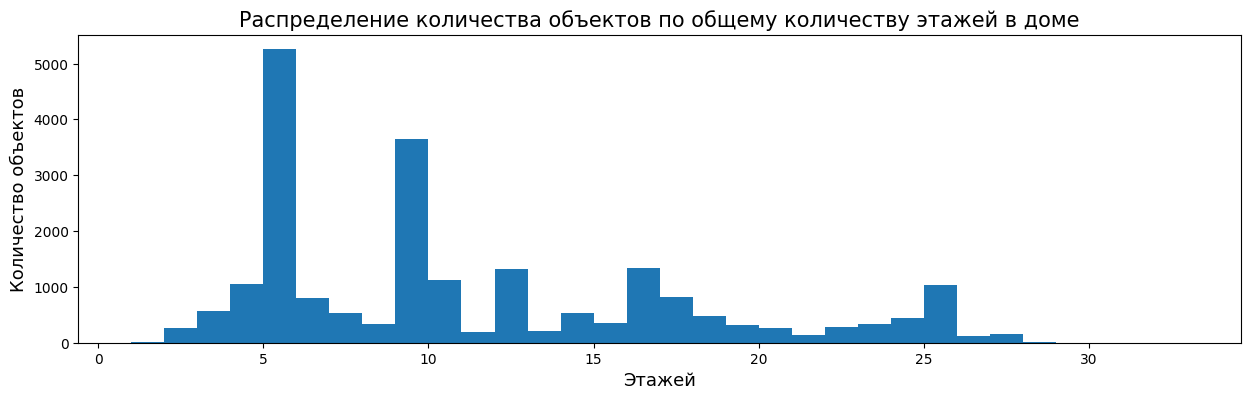

In [57]:
print(data['floors_total'].describe())
(
    data['floors_total']
    .plot(kind='hist', bins=32, figsize = (15,4))
);
plt.title("Распределение количества объектов по общему количеству этажей в доме", fontsize=15);
plt.xlabel("Этажей", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Больше было размещено объявлений о квартирах, находящихся в 4-18-этажных домах.

**Анализ расстояния до центра города**

count    17078.000000
mean     14111.030449
std       7997.564170
min        181.000000
25%       9602.250000
50%      13165.000000
75%      16238.000000
max      61495.000000
Name: cityCenters_nearest, dtype: float64


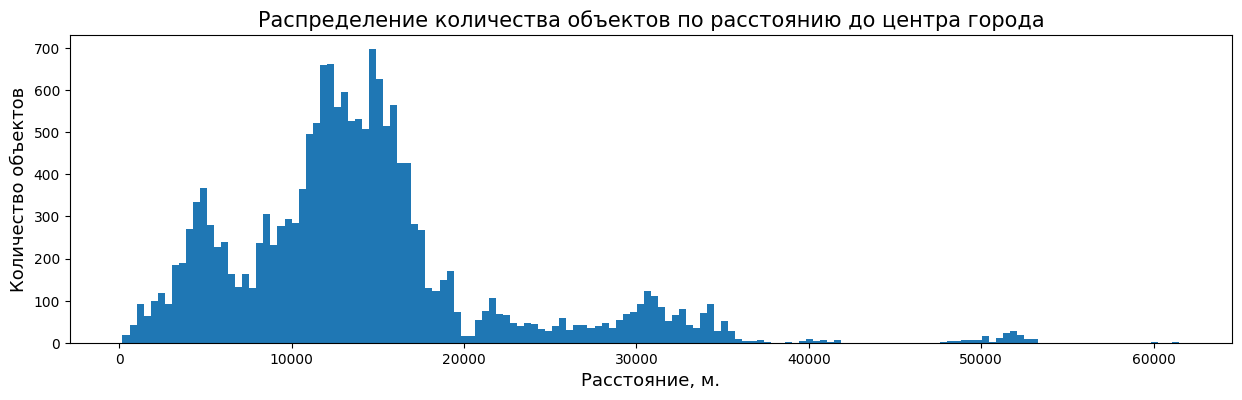

In [58]:
print(data['cityCenters_nearest'].describe())
(
    data['cityCenters_nearest']
    .plot(kind='hist', bins=150, figsize = (15,4))
);
plt.title("Распределение количества объектов по расстоянию до центра города", fontsize=15);
plt.xlabel("Расстояние, м.", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Расстояние до центра города, в большинстве, составляет от 8000 до 17000 метров. Это подверждается близкими средним (14111.03 метров) и медианным (13165 метров) значениями.

**Анализ расстояния до ближайшего аэропорта**

count    17058.000000
mean     28547.178333
std      12233.494068
min       6450.000000
25%      18398.250000
50%      26838.500000
75%      37153.000000
max      59705.000000
Name: airports_nearest, dtype: float64


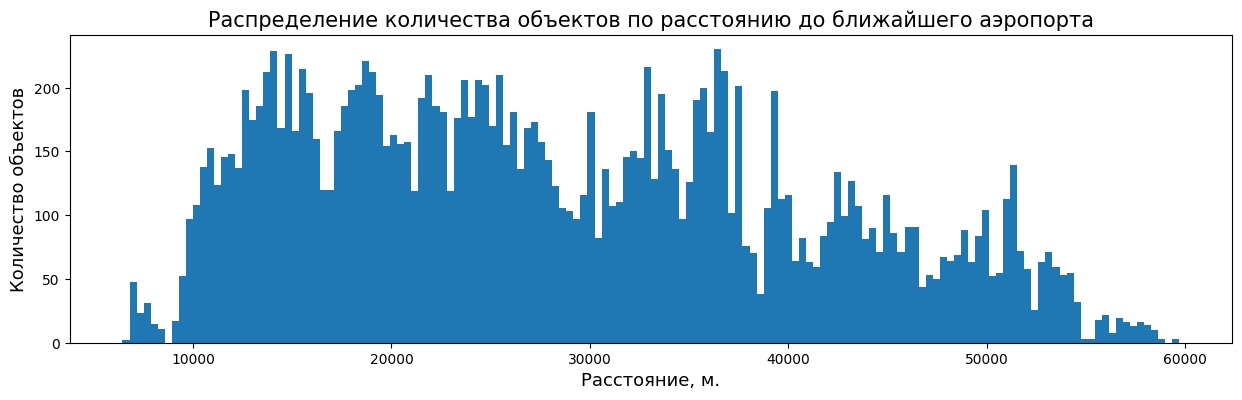

In [59]:
print(data['airports_nearest'].describe())
(
    data['airports_nearest']
    .plot(kind='hist', bins=150, figsize = (15,4))
);
plt.title("Распределение количества объектов по расстоянию до ближайшего аэропорта", fontsize=15);
plt.xlabel("Расстояние, м.", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Расстояние до аэропорта для большей части квартир составляет 10500-40500 метров. 

Медианное и среднее значения составляют 26838.5 метров и 28547.18 метров соответственно.

**Анализ расстояния до ближайшего парка**

count    7432.000000
mean      494.453714
std       340.856224
min         1.000000
25%       292.750000
50%       456.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64


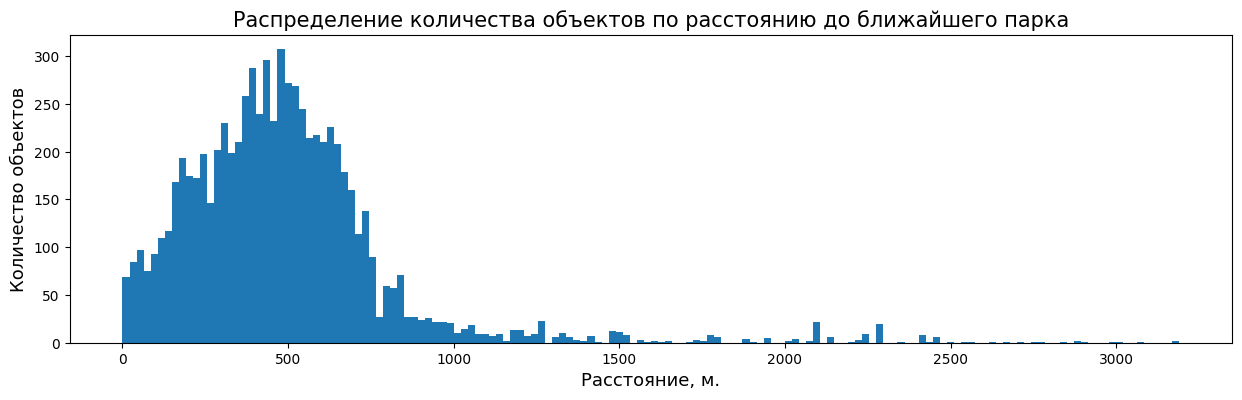

In [60]:
print(data['parks_nearest'].describe())
(
    data['parks_nearest']
    .plot(kind='hist', bins=150, figsize = (15,4))
);
plt.title("Распределение количества объектов по расстоянию до ближайшего парка", fontsize=15);
plt.xlabel("Расстояние, м.", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Большинство квартир находится на расстоянии 230-650 метров от ближайшего парка. Среднее расстояние - 494.45 метров, медианное - 456 метров.

**Анализ дня публикации объявления**

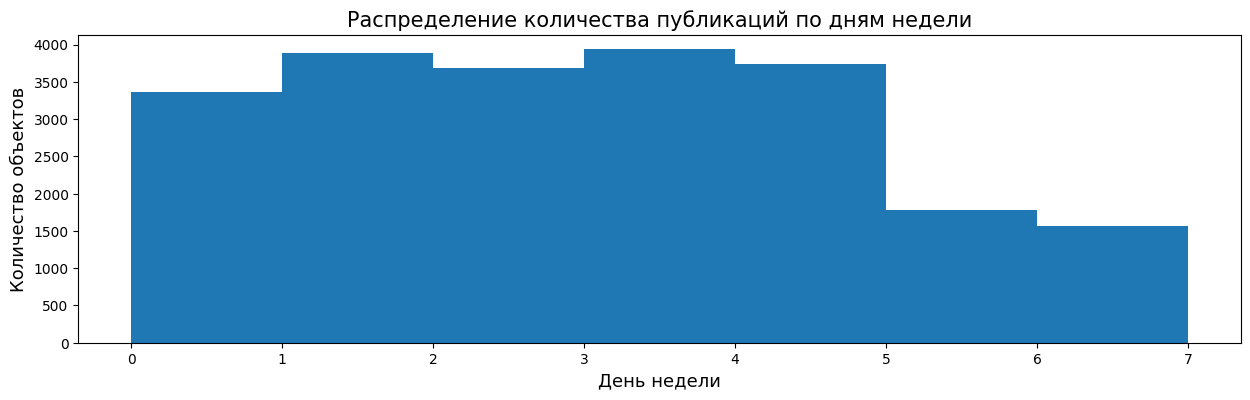

In [61]:
(
    data['weekday_exposition']
    .plot(kind='hist', bins=7, range=(0,7), figsize = (15,4))
);
plt.title("Распределение количества публикаций по дням недели", fontsize=15);
plt.xlabel("День недели", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

В основном объявления о продаже публиковались в будние дни (чаще всего в четверг). Реже (примерно вдвое) - в выходные.

**Анализ месяца публикации объявления**

In [62]:
data['month_exposition'].value_counts()

2     2448
3     2378
4     2208
11    2200
10    1998
9     1843
8     1639
6     1619
7     1572
12    1496
1     1381
5     1188
Name: month_exposition, dtype: int64

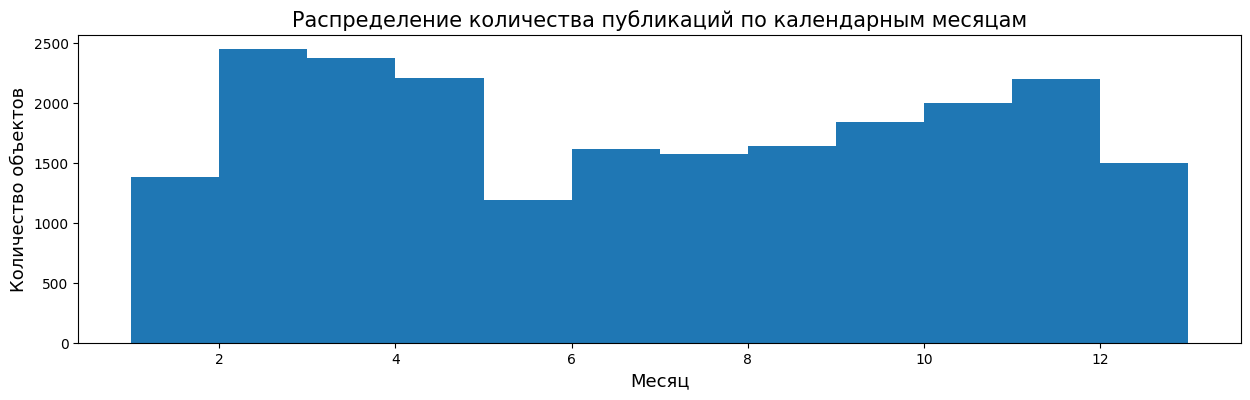

In [63]:
(
    data['month_exposition']
    .plot(kind='hist', bins=12, range=(1,13), figsize = (15,4))
);
plt.title("Распределение количества публикаций по календарным месяцам", fontsize=15);
plt.xlabel("Месяц", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Чаще объявления размещались с февраля по апрель и с сентября по ноябрь. Реже всего - в мае, декабре и январе.

### Изучение скорости продажи квартир

count    19040.000000
mean       166.618645
std        187.132527
min          1.000000
25%         44.000000
50%         93.000000
75%        219.000000
max       1000.000000
Name: days_exposition, dtype: float64


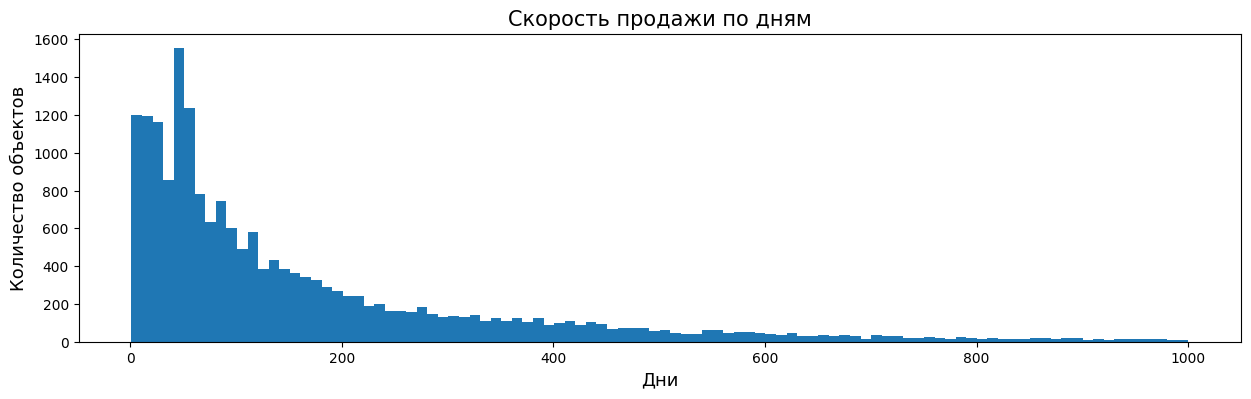

In [64]:
print(data['days_exposition'].describe())
(
    data['days_exposition']
    .plot(kind='hist', bins=100, figsize = (15,4))
);
plt.title("Скорость продажи по дням", fontsize=15);
plt.xlabel("Дни", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

Большинство квартир продается в течение 100 дней с момента размещения объявления. Средний срок продажи составляет чуть менее полугода (167 дней).

Быстрыми можно считать продажи, которые были осуществлены в первые 1.5 месяца с момента публикции объявления. Долгими можно считать те продажи, которые затянулись на 7 месяцев и более.

Дополнительно стоит рассмотреть скорость продажи, исключив ранее замеченные выбросы в 7-м, 30-м, 45-м, 60-м и 90-м днях.

In [65]:
data2 = data.copy()
data2['days_exposition'] = data2['days_exposition'].fillna(0).astype('int')
data2 = data2.query('days_exposition not in (0, 7, 30, 45, 60, 90)')

count    17117.000000
mean       180.009640
std        192.686581
min          1.000000
25%         44.000000
50%        111.000000
75%        245.000000
max       1000.000000
Name: days_exposition, dtype: float64


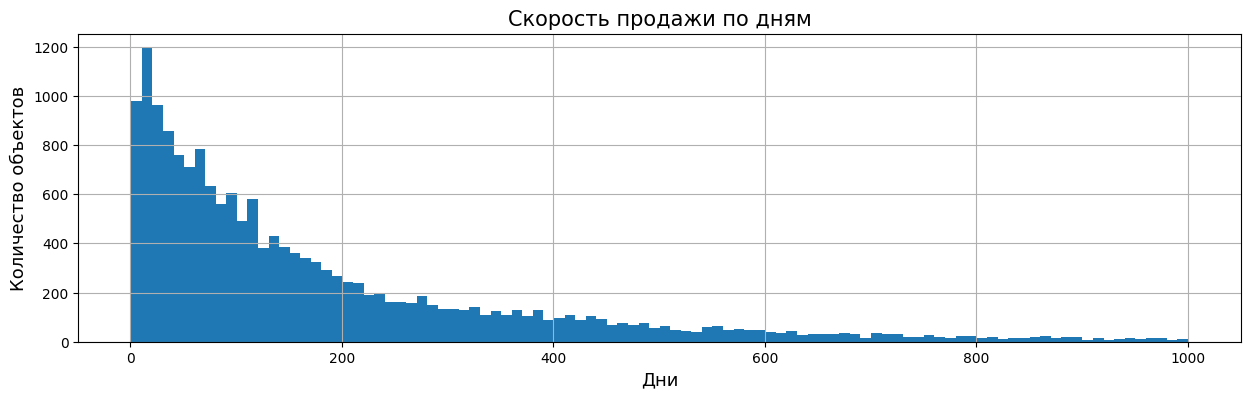

In [66]:
print(data2['days_exposition'].describe())
(
    data2['days_exposition']
    .plot(kind='hist', bins=100, figsize = (15,4), grid=True)
);
plt.title("Скорость продажи по дням", fontsize=15);
plt.xlabel("Дни", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

В случае с отфильтрованными от выбросов данными, квартиры продаются, в основном, до 115 дней. Средний срок продажи - 180 дней. Быстрыми так же считаются продажи, осуществленные в первые 1.5 месяца, а вот долгими - которые осуществлялись от 8 месяцев.

year_exposition
2014    708.188406
2015    537.003497
2016    312.015067
2017    157.606832
2018     94.060854
2019     30.798442
Name: days_exposition, dtype: float64


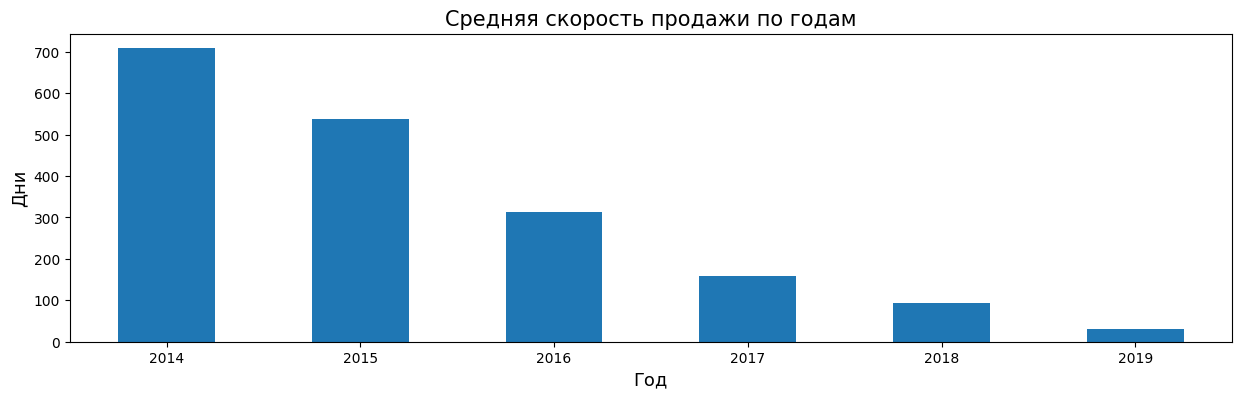

In [67]:
print(data.groupby('year_exposition')['days_exposition'].mean())
(
    data
    .groupby('year_exposition')['days_exposition'].mean()
    .plot(kind='bar', figsize=(15, 4), legend=False)    
);
plt.title("Средняя скорость продажи по годам", fontsize=15);
plt.xlabel("Год", fontsize=13);
plt.ylabel("Дни", fontsize=13);
plt.xticks(rotation=0);

С каждым годом скорость продажи увеличивалась.

### Изучение влияния различных факторов на цену объекта

Изучим коэффициет корреляции между стоимостью квартиры и:
* общей площадью;
* жилой площадью;
* площадью кухни;
* количеством комнат.

              last_price  total_area  living_area  kitchen_area     rooms
last_price      1.000000    0.775263     0.664636      0.586318  0.480647
total_area      0.775263    1.000000     0.923827      0.557601  0.785888
living_area     0.664636    0.923827     1.000000      0.321153  0.878475
kitchen_area    0.586318    0.557601     0.321153      1.000000  0.184919
rooms           0.480647    0.785888     0.878475      0.184919  1.000000


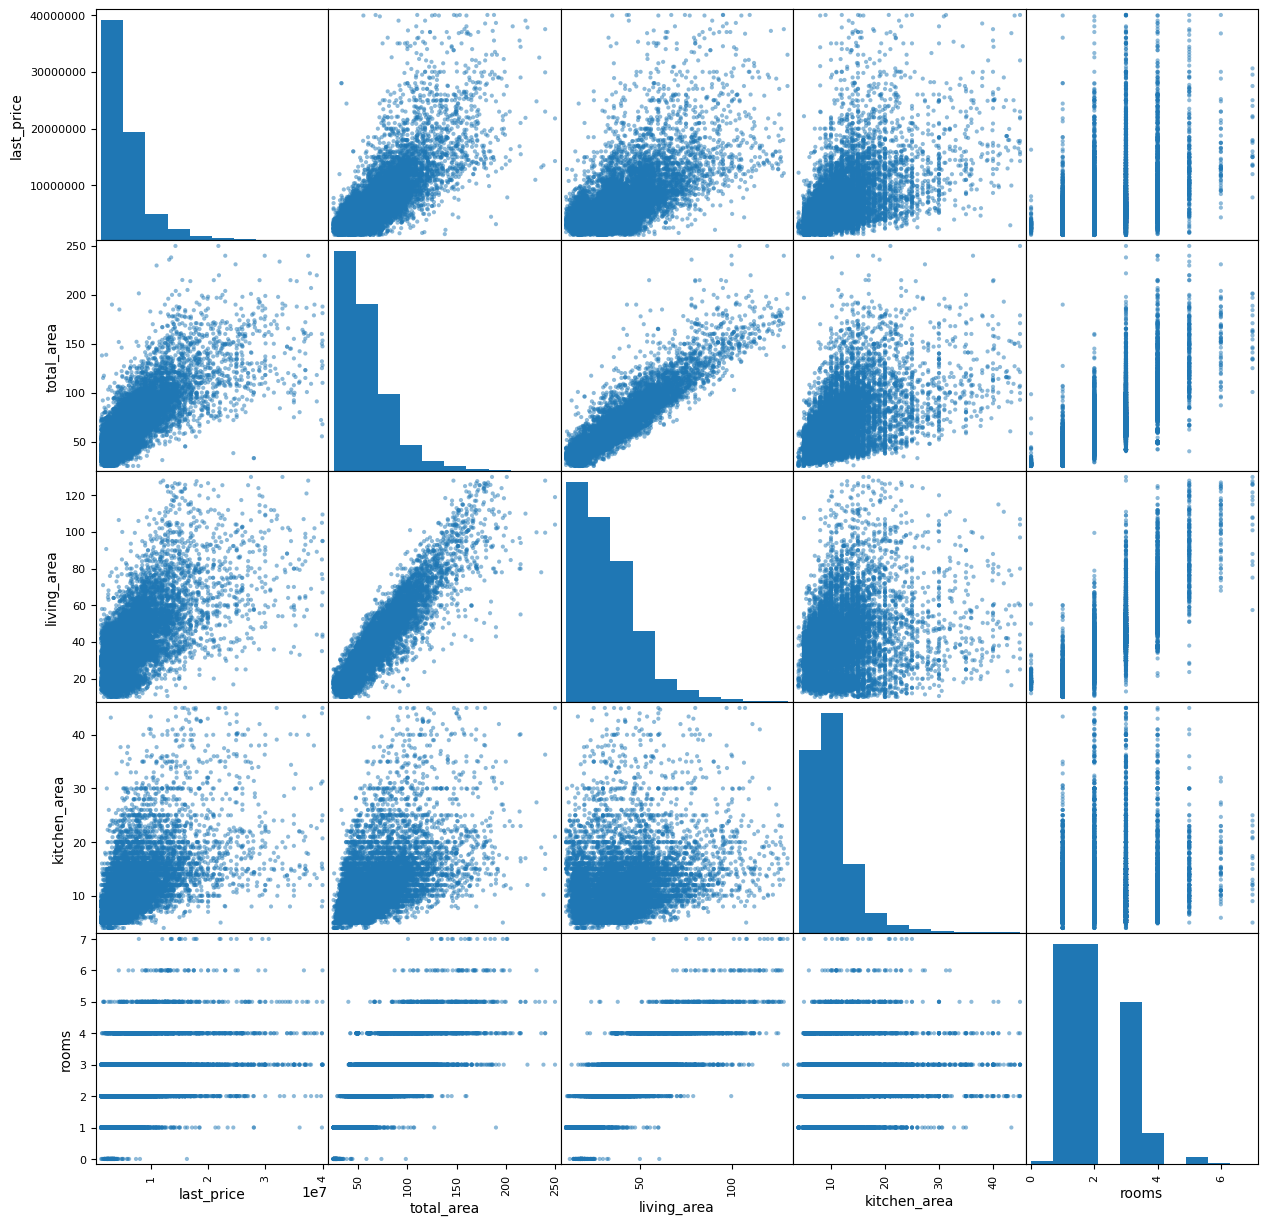

In [68]:
print(data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr())
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']],figsize=(15,15));

Полученные графики и значения показывают, что, по большей степени, цена квартиры зависит от общей площади. Несильно цена зависит от жилой площади и площади кухни, и слабо зависит от количества комнат.

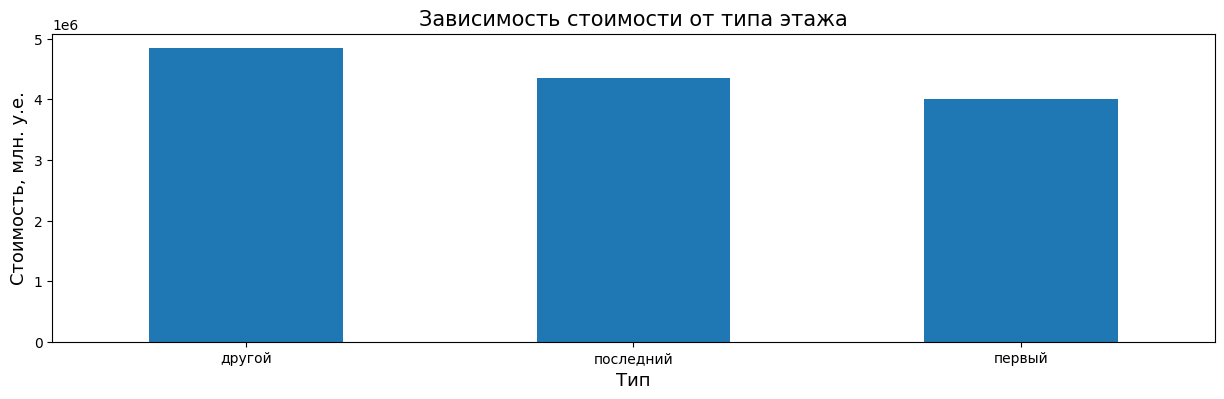

In [69]:
(
    data
    .groupby('floor_type')['last_price'].median().reset_index()
    .sort_values(by='last_price', ascending=False)
    .plot(x='floor_type', y='last_price', kind='bar', figsize=(15, 4), legend=False)
);
plt.title("Зависимость стоимости от типа этажа", fontsize=15);
plt.xlabel("Тип", fontsize=13);
plt.ylabel("Стоимость, млн. у.е.", fontsize=13);
plt.xticks(rotation=0);

Цена зависит от этажа: больше всего стоят квартиры, находящиеся между первым и последним этажами, а меньше всего - находящиеся на первом. Среднюю ценовую позицию занимают квартиры на последних этажах.

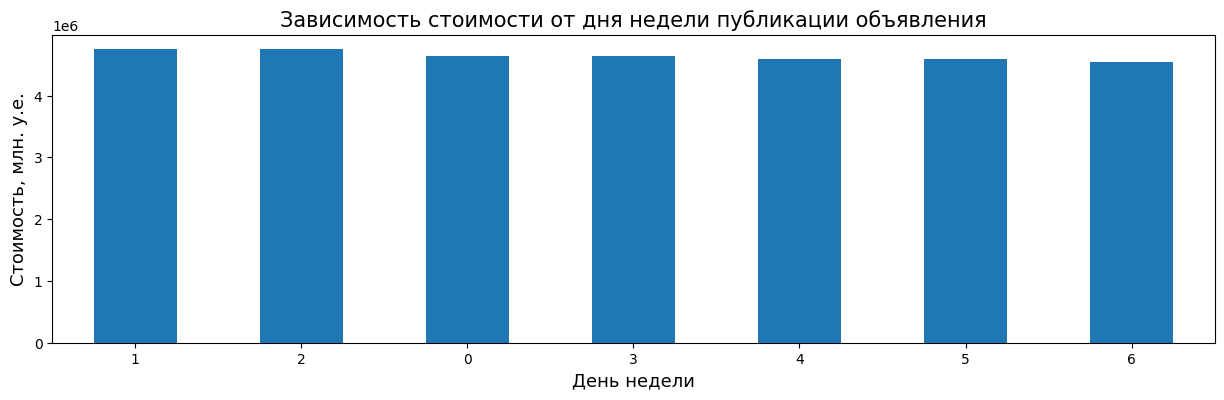

In [70]:
(
    data
    .groupby('weekday_exposition')['last_price'].median().reset_index()
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='bar', figsize=(15, 4), legend=False)
);
plt.title("Зависимость стоимости от дня недели публикации объявления", fontsize=15);
plt.xlabel("День недели", fontsize=13);
plt.ylabel("Стоимость, млн. у.е.", fontsize=13);
plt.xticks(rotation=0);

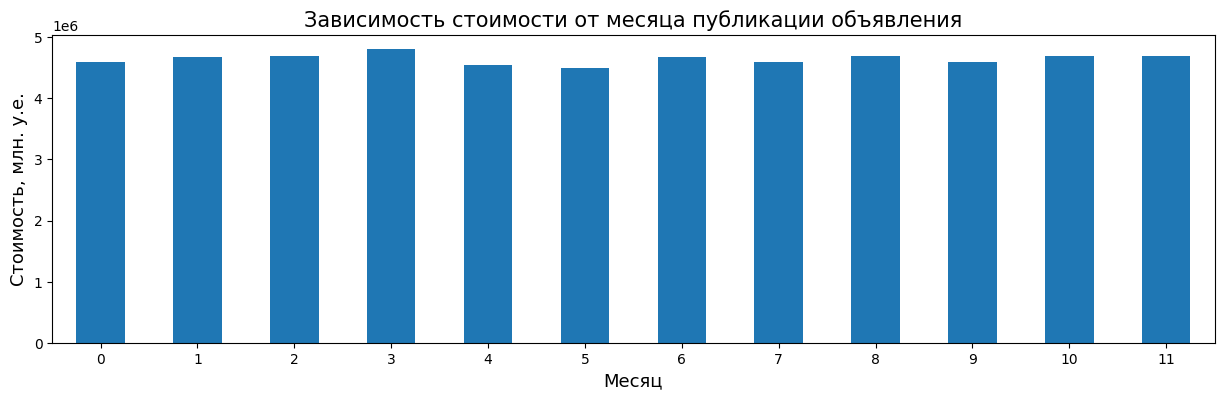

In [71]:
(
    data
    .groupby('month_exposition')['last_price'].median().reset_index()
    .sort_values(by='month_exposition')
    .plot(y='last_price', kind='bar', figsize=(15, 4), legend=False)
)
plt.title("Зависимость стоимости от месяца публикации объявления", fontsize=15);
plt.xlabel("Месяц", fontsize=13);
plt.ylabel("Стоимость, млн. у.е.", fontsize=13);
plt.xticks(rotation=0);

Какая-либо значимая зависимость цены от дня недели или месяца публикации не наблюдается.

   year_exposition  last_price
0             2014   7488280.0
1             2015   5100000.0
2             2016   4550000.0
3             2017   4500000.0
4             2018   4650000.0
5             2019   5100000.0


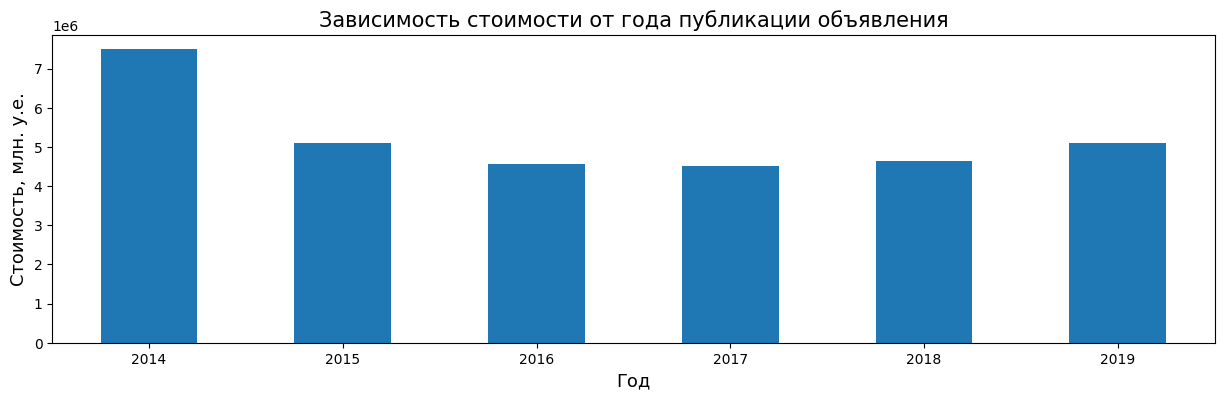

In [72]:
print(data.groupby('year_exposition')['last_price'].median().reset_index())
(
    data
    .groupby('year_exposition')['last_price'].median().reset_index()
    .sort_values(by='year_exposition')
    .plot(x='year_exposition', y='last_price', kind='bar', figsize=(15, 4), legend=False)
)
plt.title("Зависимость стоимости от года публикации объявления", fontsize=15);
plt.xlabel("Год", fontsize=13);
plt.ylabel("Стоимость, млн. у.е.", fontsize=13);
plt.xticks(rotation=0);

   year_exposition  total_area
0             2014      75.015
1             2015      58.000
2             2016      53.020
3             2017      52.000
4             2018      51.000
5             2019      52.000


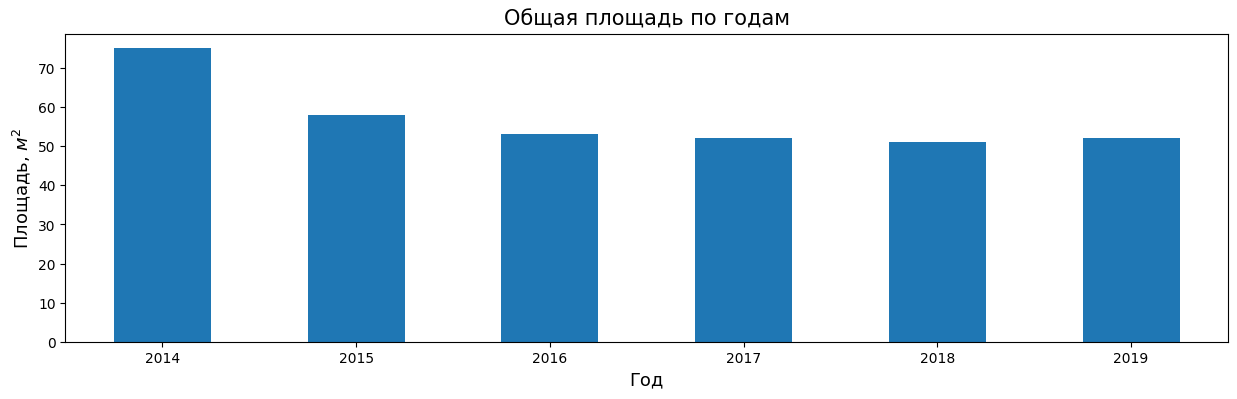

In [73]:
print(data.groupby('year_exposition')['total_area'].median().reset_index())
(
    data
    .groupby('year_exposition')['total_area'].median().reset_index()
    .sort_values(by='year_exposition')
    .plot(x='year_exposition', y='total_area', kind='bar', figsize=(15, 4),legend=False)
)
plt.title("Общая площадь по годам", fontsize=15);
plt.xlabel("Год", fontsize=13);
plt.ylabel("Площадь, $м^2$", fontsize=13);
plt.xticks(rotation=0);

   year_exposition  living_area
0             2014       42.925
1             2015       33.000
2             2016       31.000
3             2017       30.000
4             2018       30.000
5             2019       30.000


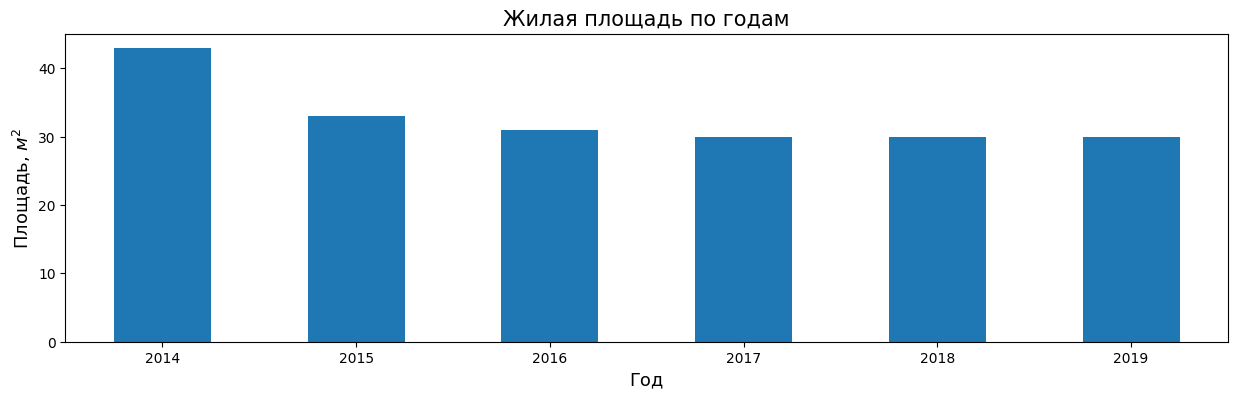

In [74]:
print(data.groupby('year_exposition')['living_area'].median().reset_index())
(
    data
    .groupby('year_exposition')['living_area'].median().reset_index()
    .sort_values(by='year_exposition')
    .plot(x='year_exposition', y='living_area', kind='bar', figsize=(15, 4), legend=False)
)
plt.title("Жилая площадь по годам", fontsize=15);
plt.xlabel("Год", fontsize=13);
plt.ylabel("Площадь, $м^2$", fontsize=13);
plt.xticks(rotation=0);

   year_exposition  last_price
0             2014          86
1             2015         920
2             2016        2579
3             2017        7705
4             2018        7980
5             2019        2700


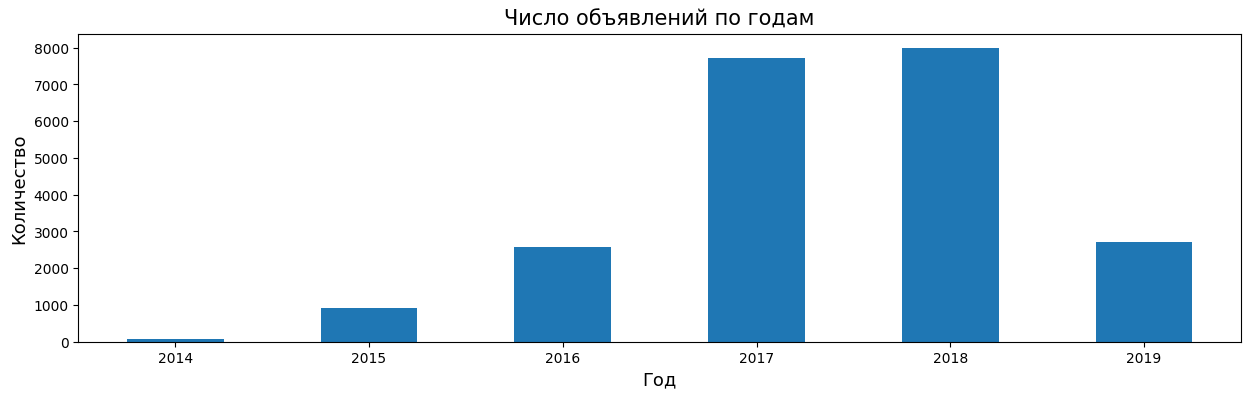

In [75]:
print(data.groupby('year_exposition')['last_price'].count().reset_index())
(
    data
    .groupby('year_exposition')['last_price'].count().reset_index()
    .sort_values(by='year_exposition')
    .plot(x='year_exposition', y='last_price', kind='bar', figsize=(15, 4), legend=False)
)
plt.title("Число объявлений по годам", fontsize=15);
plt.xlabel("Год", fontsize=13);
plt.ylabel("Количество", fontsize=13);
plt.xticks(rotation=0);

Имеется зависимость цены квартиры от года: в 2014 году цены были наивысшими (7.49 млн. у.е.). Далее до 2018 года снижались (4.5 млн. у.е.), а затем снова начали расти (до 5.1 млн. у.е. в 2019 году). 

Общая площадь также уменьшалась, но до 2019 года (с 72 $м^2$ до 51 $м^2$). В 2019 году незначительно выросла - до 52 $м^2$.

Жилая площадь с 2014 до 2017 года уменьшилась c 42.9 $м^2$ до 31 $м^2$, и затем осталась на неизменном уровне (30 $м^2$).

**В общем можно сказать, что с уменьшением общей и жилой площади уменьшалась и стоимость. Исключение - 2018-2019 годы, когда при практически неизменной площади росла цена.**

При этом количество объявлений в 2014 году было минимальным (86 публикаций) и все сильнее росло с годами. Пик был в 2018 году (7980 публикаций). В 2019 году произошло резкое снижение количества публикаций до 2700.

### Вычисление средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [76]:
locality_top_stat = data['locality_name'].value_counts().head(10)

In [77]:
(
    data
    .query('locality_name in @locality_top_stat.index')
    .groupby('locality_name')['square_meter_price'].mean().round(2).reset_index()
    .sort_values(by='square_meter_price', ascending=False).reset_index(drop=True)   
)

,locality_name,square_meter_price
0,Санкт-Петербург,111220.12
1,Пушкин,102686.16
2,поселок Парголово,92779.94
3,деревня Кудрово,92055.97
4,Мурино,85457.84
5,поселок Шушары,78115.99
6,Колпино,75204.19
7,Гатчина,69292.01
8,Всеволожск,68773.40
9,Выборг,58986.76


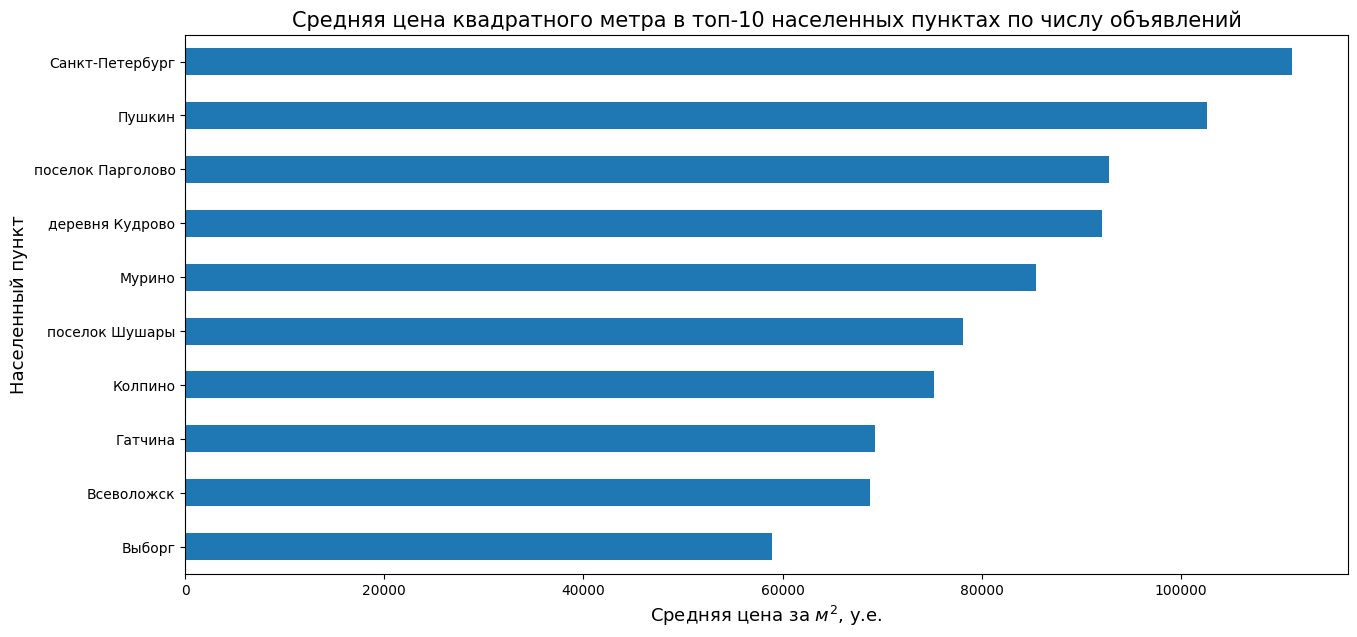

In [78]:
(
    data
    .query('locality_name in @locality_top_stat.index')
    .pivot_table(index='locality_name', values='square_meter_price')
    .sort_values(by='square_meter_price', ascending=True)
    .plot(kind='barh', figsize=(15,7), legend=False)
);
plt.title("Средняя цена квадратного метра в топ-10 населенных пунктах по числу объявлений", 
          fontsize=15);
plt.xlabel("Средняя цена за $м^2$, у.е.", fontsize=13);
plt.ylabel("Населенный пункт", fontsize=13);

Самая высокая цена за $м^2$ среди 10 населенных пунктах с наибольшим числом объявлений - в Санкт-Петербурге, а самая низкая - в Выборге.

### Вычисление средней цены километра

Посчитаем среднюю цену каждого километра от центра Санкт-Петербурга и проверим существование зависимости.

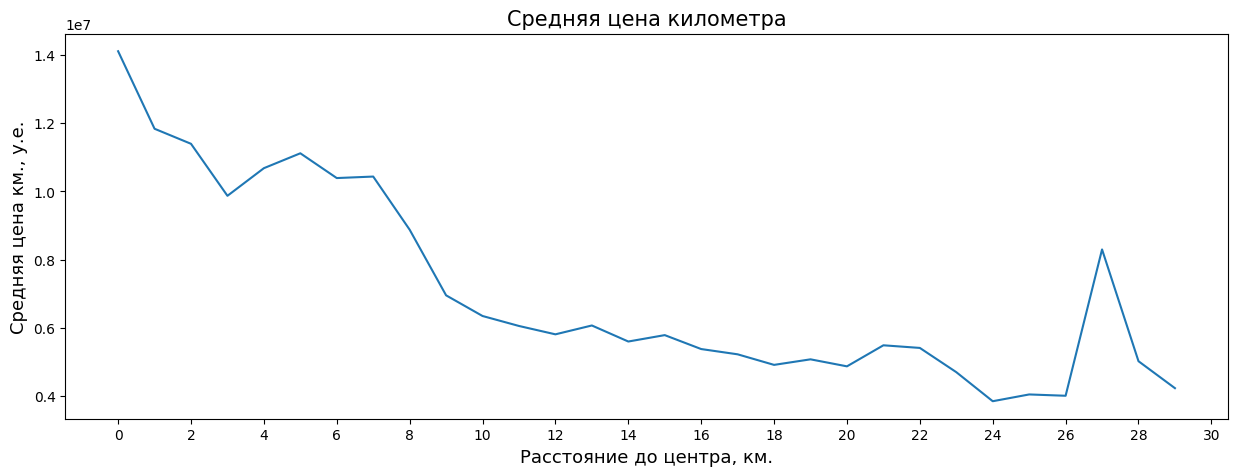

In [79]:
km_price = (
    data
    .query('locality_name == "Санкт-Петербург"')['cityCenters_nearest_km']
    .value_counts()
)
(
    data
    .query('(cityCenters_nearest_km in @km_price.index) and (locality_name == "Санкт-Петербург")')
    .groupby('cityCenters_nearest_km')['last_price'].mean()
    .plot(figsize=(15, 5), legend=False)
);
plt.locator_params(axis='x', nbins=30)
plt.title("Средняя цена километра", fontsize=15);
plt.xlabel("Расстояние до центра, км.", fontsize=13);
plt.ylabel("Средняя цена км., у.е.", fontsize=13);

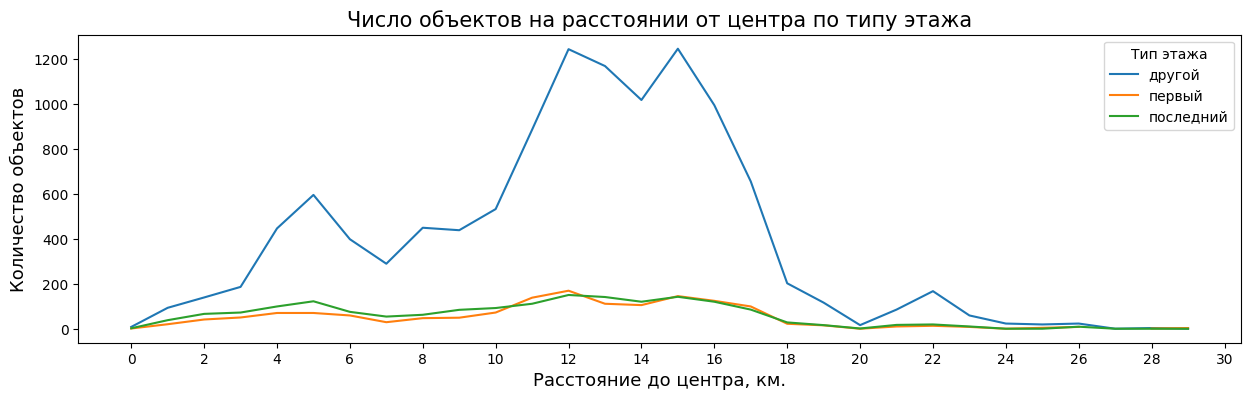

In [80]:
(
    data
    .query('(cityCenters_nearest_km in @km_price.index) and (locality_name == "Санкт-Петербург")')
    .pivot_table(index='cityCenters_nearest_km', values='last_price', columns='floor_type', aggfunc='count')
    .plot(figsize=(15,4))
);
plt.locator_params(axis='x', nbins=30)
plt.legend(title='Тип этажа');
plt.title("Число объектов на расстоянии от центра по типу этажа", fontsize=15);
plt.xlabel("Расстояние до центра, км.", fontsize=13);
plt.ylabel("Количество объектов", fontsize=13);

In [81]:
(
    data
    .query('(cityCenters_nearest_km == 27) and (locality_name == "Санкт-Петербург")')['last_price']
    .value_counts()
    .sort_index(ascending=False)
)

14350000.0    1
2250000.0     1
Name: last_price, dtype: int64

На графике стоимости километра видно, что чем дальше от центра Санкт-Петербурга, тем ниже средняя цена за квартиру. Сопоставляя его с графиком типа этажа, на котором располагается квартира, также видно, что число продаваемых объектов каждого типа мало. Сам центр северной столицы можно ограничить радиусом 3 км. - здесь находится элитное жилье.

На расстоянии от 3 до 5 км. ситуация меняется: резко возрастает число квартир, располагающихся между первым и последним этажами. Поскольку такие квартиры, как было выяснено ранее, пользуются большим спросом, цена на них также возрастает. Здесь находится спальная зона с квартирами высокого ценового сегмента.

Остальные объекты достаточно удалены от центра, их число велико, а цена - ниже.

Аномальным значением в данной выборке, которое не могло быть устранено на этапе предобработки - квартира на 27-м километре с необоснованно высокой ценой в 14.35 млн. у.е.

## Общий вывод

Был исследован набор данных сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. 

Предоставленный набор данных имеет множество пропущенных значений, которые нечем компенсировать. Необходимо уточнить у специалистов, выгружавших эти данные, почему так произошло.

В результате предобработки и последующего исследовательского анализа установлено следующее:
* Площадь большинства квартир находится в интервале от 27 до 75 $м^2$. Медиана - 52 $м^2$, среднее - 58.21 $м^2$.
* Основная масса квартир представлена диапазонами жилой площади, примерно, от 15 до 21 $м^2$ и от 25 до 50 $м^2$. Медиана - 30 $м^2$, среднее - 33.12 $м^2$.
* Большинство квартир имеет площадь кухни от 5 до 13 $м^2$. Медиана - 9.1 $м^2$, среднее - 10.29 $м^2$.
* Цена на большинство квартир находится в пределах 2-8 млн. у.е. Медиана - 4.65 млн. у.е., среднее - 5.87 млн. у.е. 
* Больше всего объявлений было размещено о продаже 1-2-коммнатных квартир. Также преобладают и трехкомнатные квартиры.
* Большинство представленных квартир имеет высоту потолка от 2.5 до 2.8 метров.
* Квартиры, в основном, располагаются на 1-10 этажах.
* Больше всего продавалось квартир, находящихся между первым и последним этажами.
* Больше было размещено объявлений о квартирах, находящихся в 4-18-этажных домах. 
* Расстояние до центра города, в большинстве, составляет от 8 тыс. м. до 17 тыс. м. Медиана - 13.165 тыс. м., среднее - 14.111 тыс. м.
* Расстояние до аэропорта для большей части квартир составляет 10.5-40.5 тыс. м. Медиана - 26.839 тыс. м., среднее - 28.547 тыс. м.
* Большинство квартир находится на расстоянии 230-650 метров от ближайшего парка. Медиана - 456 м., среднее - 494.45 м.
* В основном объявления о продаже публиковались в будние дни (чаще всего - в четверг). Реже - в выходные.
* Чаще объявления размещались с февраля по апрель и с сентября по ноябрь. Реже всего - в мае, декабре и январе.
* Большинство квартир продается в течение 100 дней с момента размещения объявления. Средний срок продажи составляет 167 дней.

Также по зависимости цены квартиры от различных факторов установлено следующее:
* По большей степени цена квартиры зависит от общей площади. Несильно цена зависит от жилой площади и площади кухни, и слабо зависит от количества комнат.
* Цена зависит от этажа: больше всего стоят квартиры, находящиеся между первым и последним этажами, а меньше всего - находящиеся на первом.
* Цена не зависит от дня недели или месяца публикации объявления.
* В 2014 году цены на квартиры были наивысшими. Причиной этому является большая площадь продаваемых объектов, а цена, как ранее было сказано, зависит от площади.
* Самая высокая цена за $м^2$ среди 10 населенных пунктах с наибольшим числом объявлений - в Санкт-Петербурге (111.220 тыс. у.е.), самая низкая - в Выборге (58.987 тыс. у.е.).
* В радиусе 3 км. от Санкт-Петербурга находится элитное жилье - малое число квартир на этажах различного типа с высокой стоимостью. В радиусе 3-5 км. находится большое число квартир с высокой ценой на популярных этажах (между первым и последним). Остальные объекты достаточно удалены от центра, и их число велико, а цена - ниже. 